In [569]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [570]:
data = pd.read_csv('/kaggle/input/data-after-test-stats/application_train_vf_after_test_stat.csv')

In [571]:
data.columns

Index(['Unnamed: 0', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_18',
       'AMT_REQ_CREDIT_BUREAU_DA

## Catégorielles

In [572]:
for col in data.select_dtypes(include ='object').columns:
    print(f"{col} : {data[col].nunique()} catégories différentes")

NAME_CONTRACT_TYPE : 2 catégories différentes
CODE_GENDER : 3 catégories différentes
FLAG_OWN_CAR : 2 catégories différentes
FLAG_OWN_REALTY : 2 catégories différentes
NAME_TYPE_SUITE : 7 catégories différentes
NAME_INCOME_TYPE : 8 catégories différentes
NAME_EDUCATION_TYPE : 5 catégories différentes
NAME_FAMILY_STATUS : 6 catégories différentes
NAME_HOUSING_TYPE : 6 catégories différentes
OCCUPATION_TYPE : 18 catégories différentes
WEEKDAY_APPR_PROCESS_START : 7 catégories différentes
ORGANIZATION_TYPE : 58 catégories différentes
FONDKAPREMONT_MODE : 4 catégories différentes
HOUSETYPE_MODE : 3 catégories différentes
WALLSMATERIAL_MODE : 7 catégories différentes
EMERGENCYSTATE_MODE : 2 catégories différentes
date_mensuelle : 96 catégories différentes


# Variables numériques

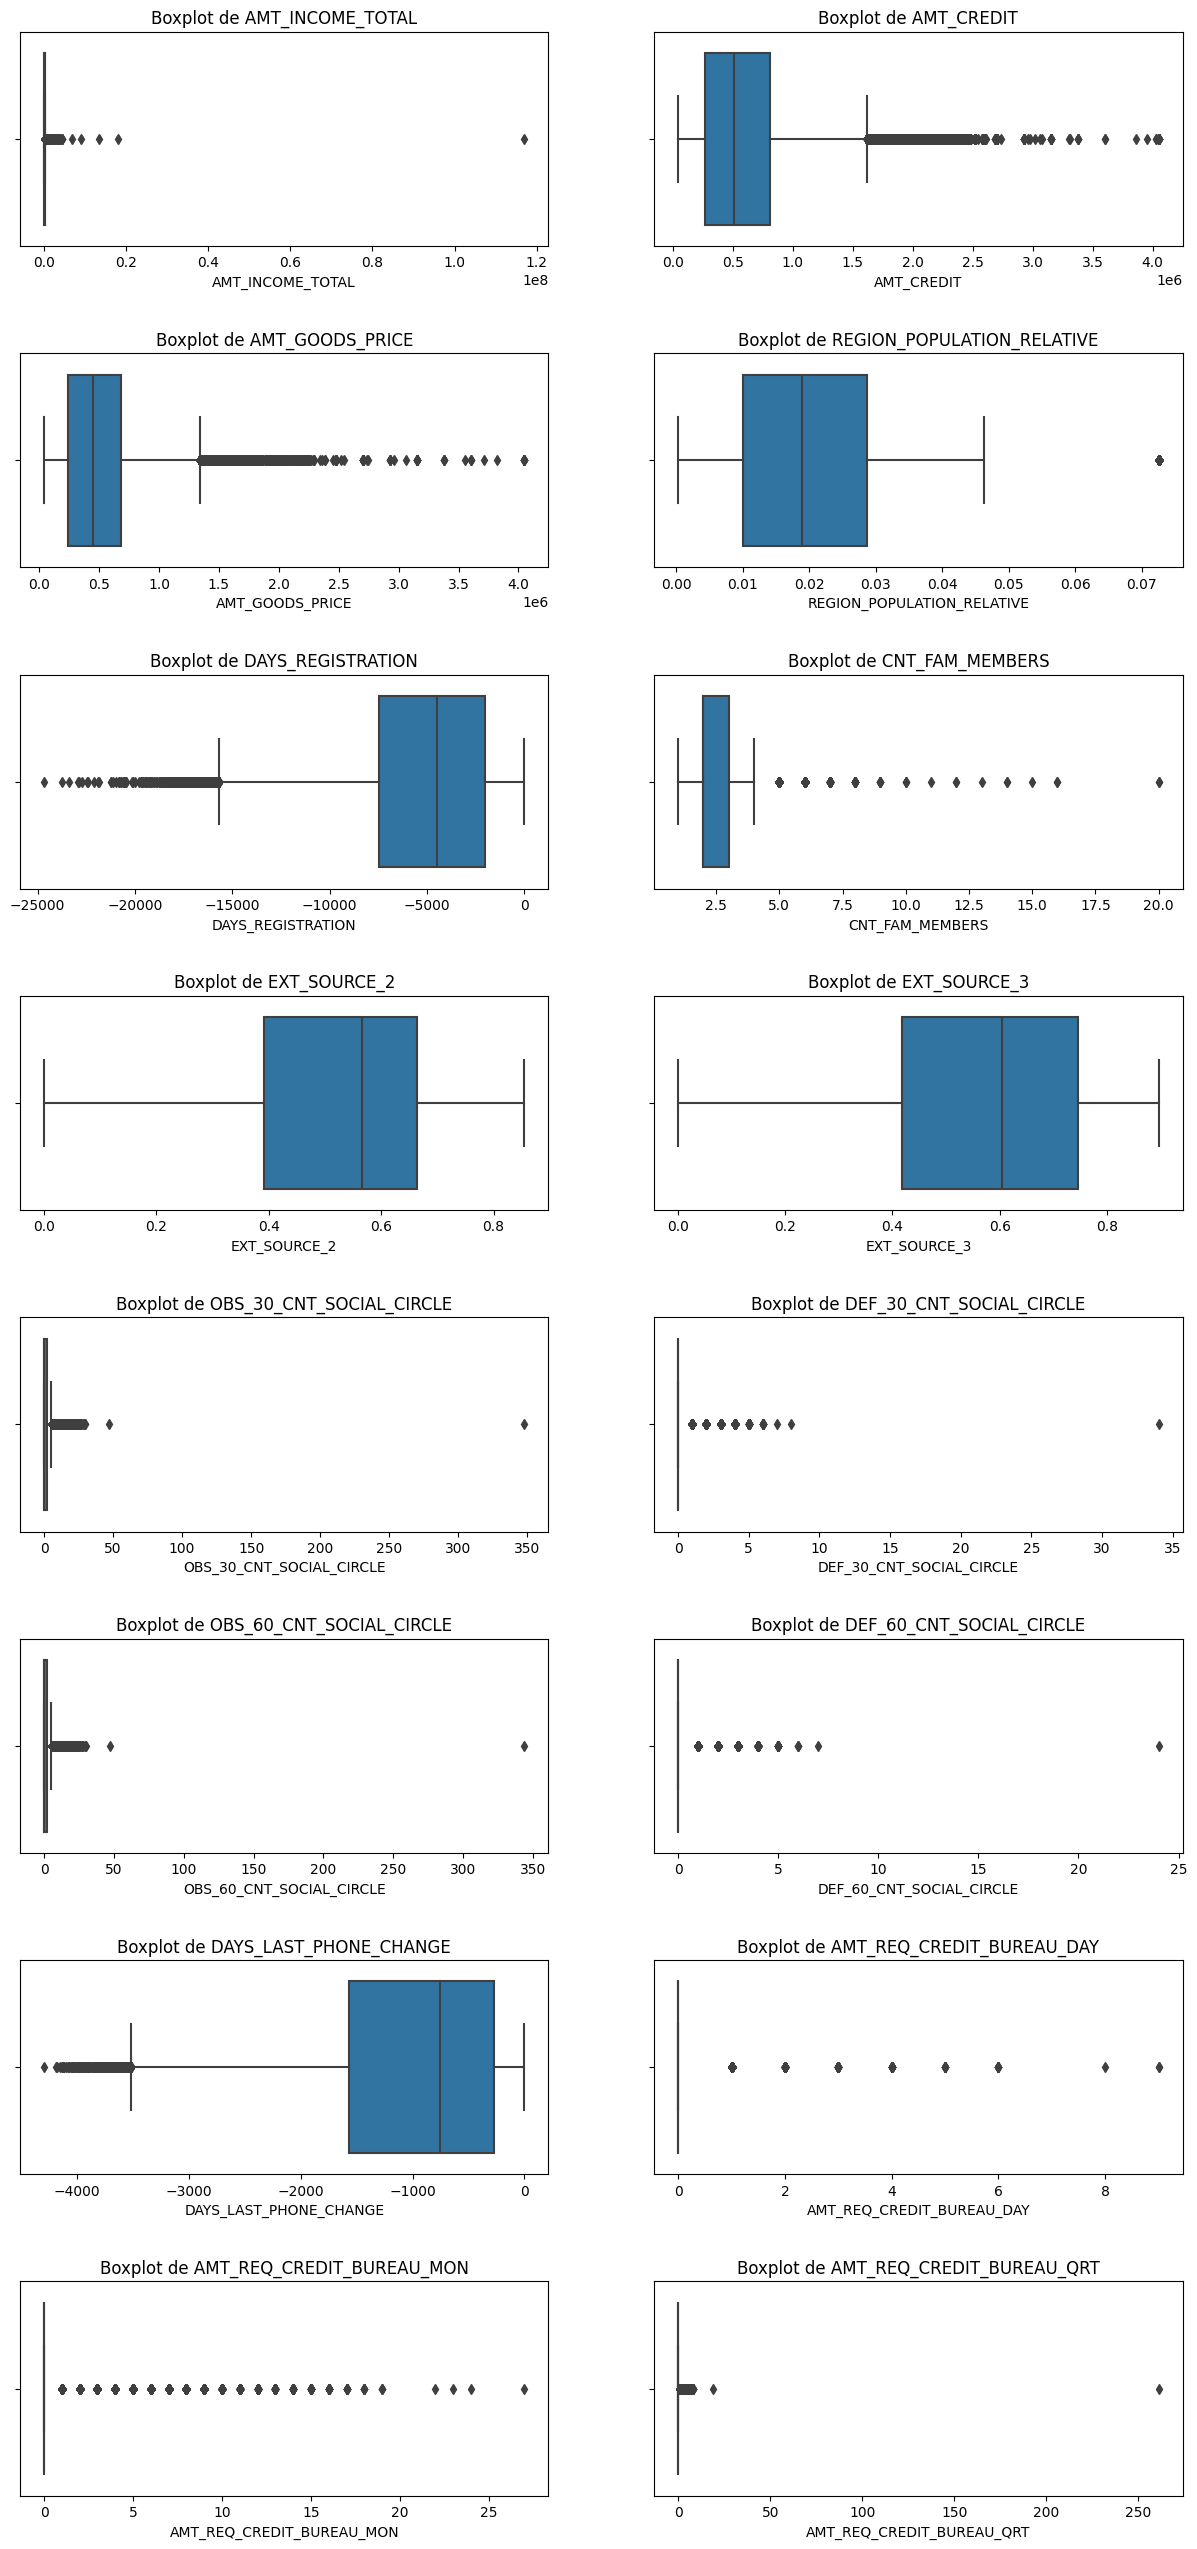

In [573]:
float_columns = data.select_dtypes(include='float').columns

num_cols = 2
num_rows = (len(float_columns) + 1) // 2  # Ajoutez 1 pour gérer les cas impairs

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))

fig.subplots_adjust(hspace=0.5)

axes = axes.flatten()

for i, col in enumerate(float_columns):
    sns.boxplot(x=data[col], ax=axes[i])
    axes[i].set_title(f'Boxplot de {col}')

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version

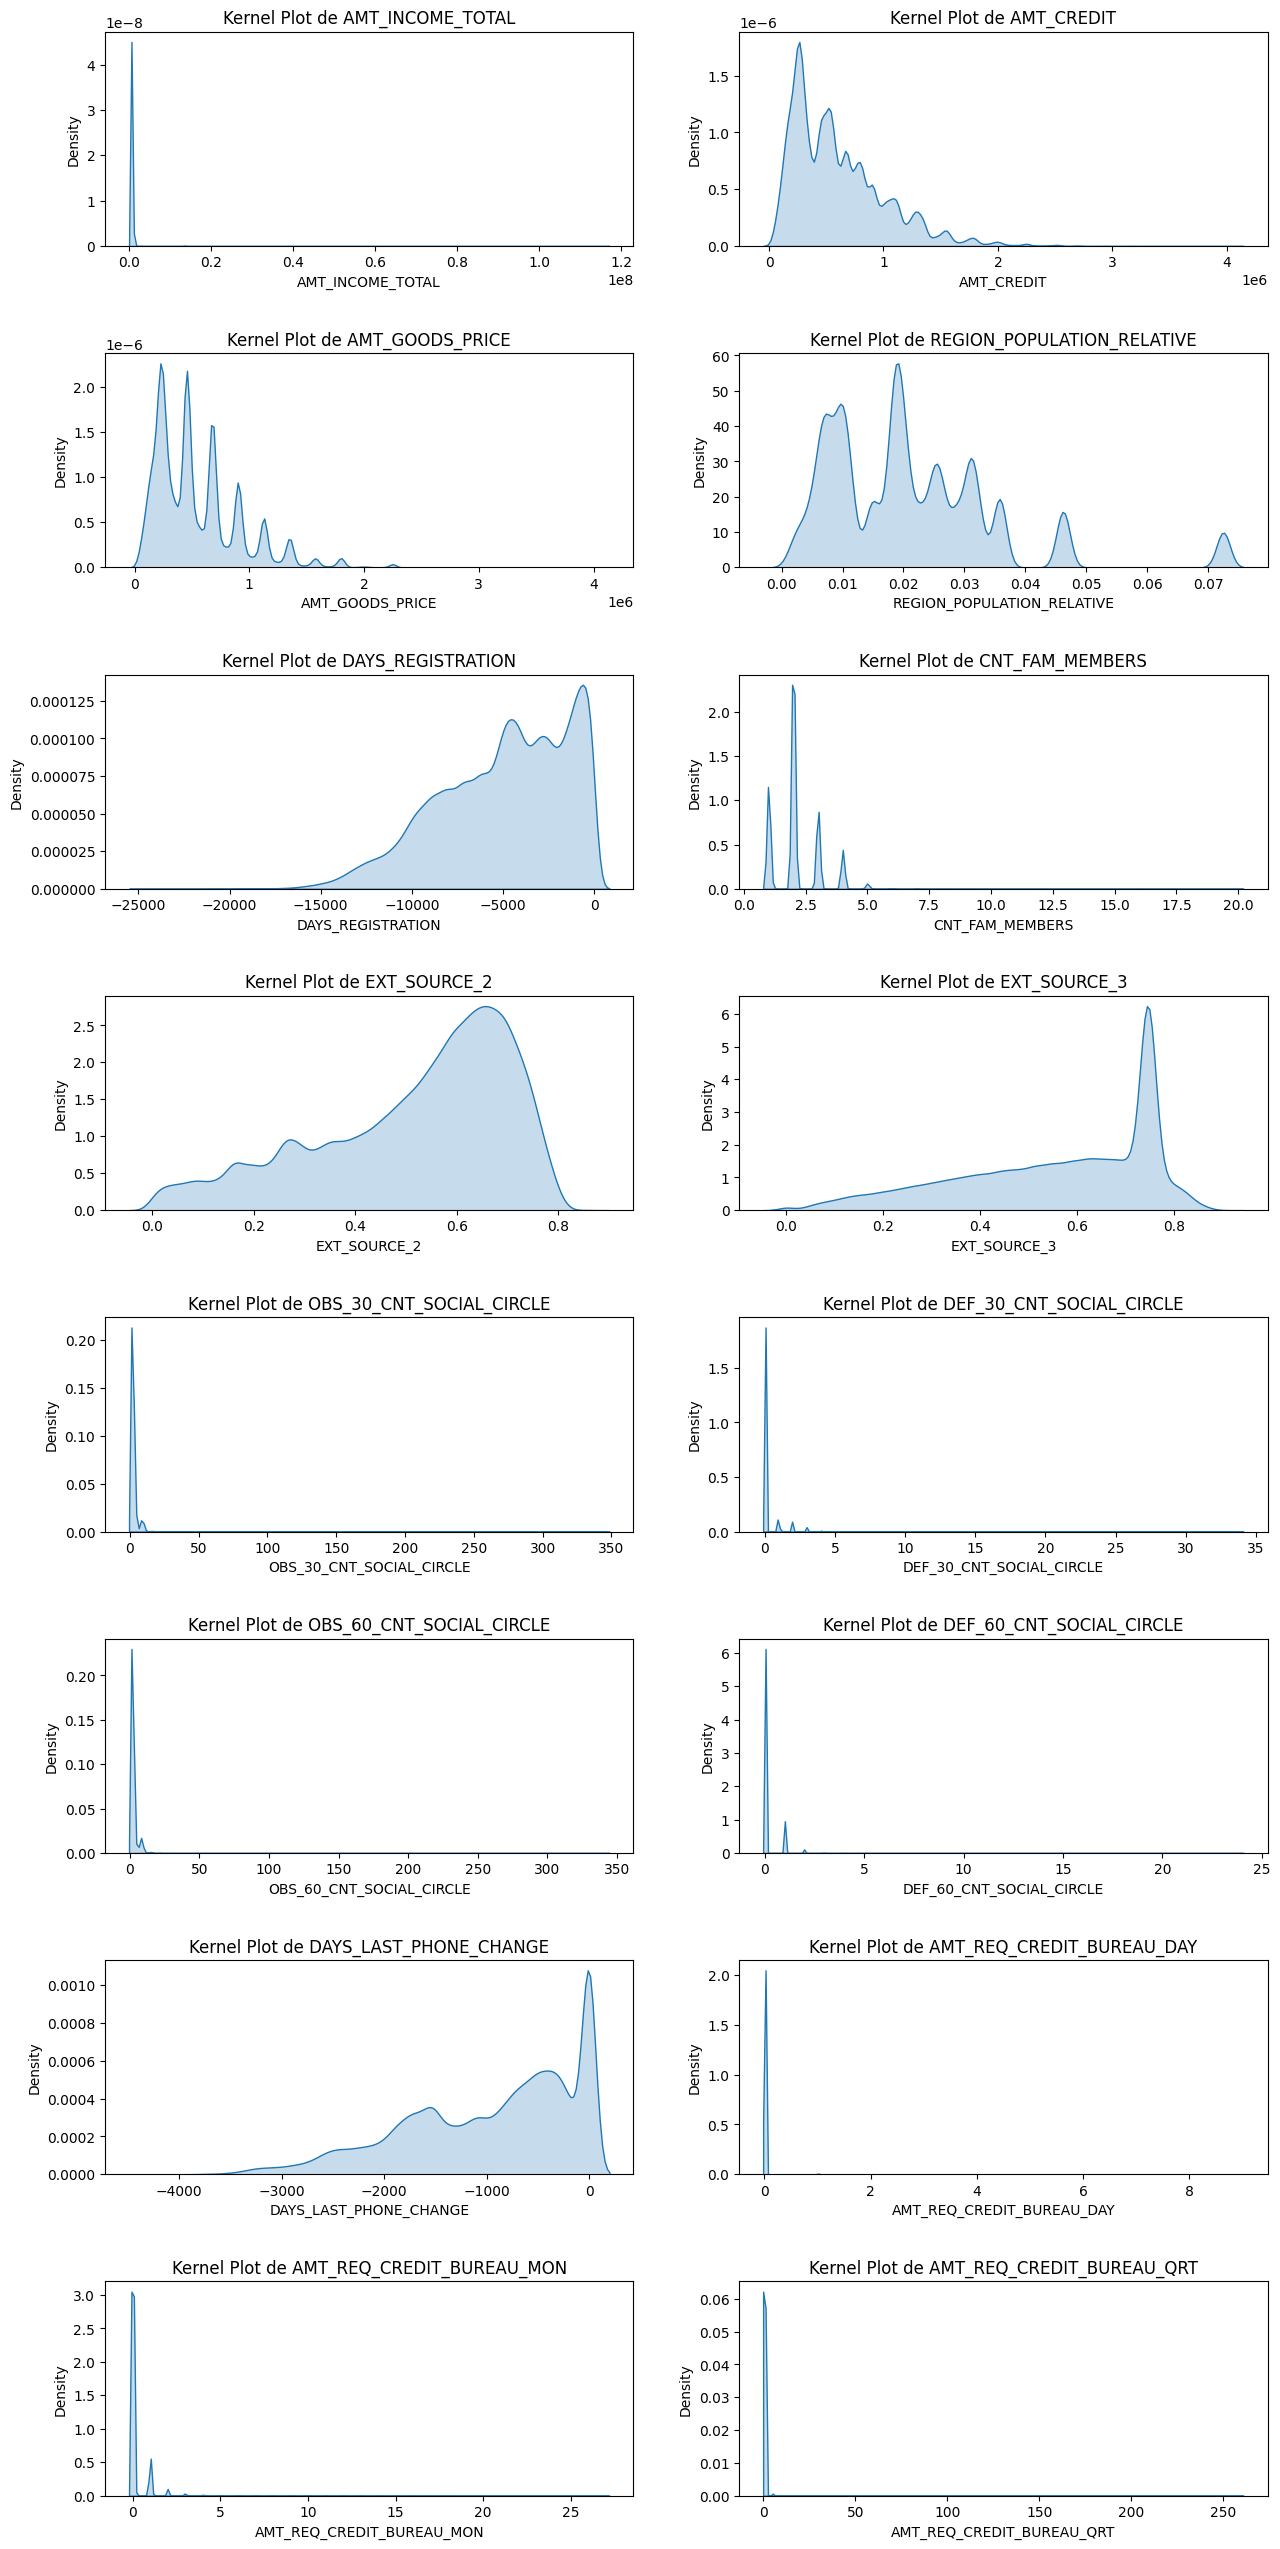

In [574]:
float_columns = data.select_dtypes(include='float').columns

num_cols = 2
num_rows = (len(float_columns) + 1) // 2  # Ajoutez 1 pour gérer les cas impairs

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))

fig.subplots_adjust(hspace=0.5)

axes = axes.flatten()

for i, col in enumerate(float_columns):
    sns.kdeplot(x=data[col], ax=axes[i], fill=True)
    axes[i].set_title(f'Kernel Plot de {col}')

plt.show()

# Discrétisation

## Catégorielles

### on check quelles variables vont être poubelle à 100%

In [575]:
import plotly.express as px
category_counts = data['NAME_TYPE_SUITE'].value_counts().reset_index()
category_counts.columns = ['Catégorie', 'Fréquence']

# Création du diagramme à barres avec Plotly Express
bar_fig = px.bar(category_counts, x='Catégorie', y='Fréquence', title='Vérification des effectifs par nouvelles modalités',
                 labels={'Catégorie': 'Catégorie', 'Fréquence': 'Fréquence'})

bar_fig.show()  # Correction : Utilisation de la méthode show() pour afficher la figure

## NAME_TYPE_SUITE

In [576]:
list_mean = []
for cat in data['NAME_TYPE_SUITE'].unique():
    moyenne = data[data['NAME_TYPE_SUITE']==cat]['TARGET'].mean()
    list_mean.append(moyenne)
    
motif = pd.DataFrame(list_mean, columns=['moyenne'])
motif['family'] = data['NAME_TYPE_SUITE'].unique()
motif.sort_values(ascending=False, by = 'moyenne', inplace=True)
motif.dropna(inplace=True)
motif.reset_index(drop=True, inplace=True)
motif

moyenne           family
0  0.092666          Other_B
1  0.081481  Group of people
2  0.081395          Other_A
3  0.077876    Unaccompanied
4  0.074571  Spouse, partner
5  0.070705           Family
6  0.070089         Children

In [577]:
other = ['Other_B' , 'Group of people', 'Other_A']
alone = ["Unaccompanied"]  
not_alone = ['Spouse, partner', 'Family', 'Children']

data['NAME_TYPE_SUITE_discret'] = np.select(
    [
        data['NAME_TYPE_SUITE'].isin(other),
        data['NAME_TYPE_SUITE'].isin(alone),
        data['NAME_TYPE_SUITE'].isin(not_alone)
    ],
    ['other', 'alone', 'not_alone'],
    default='other')

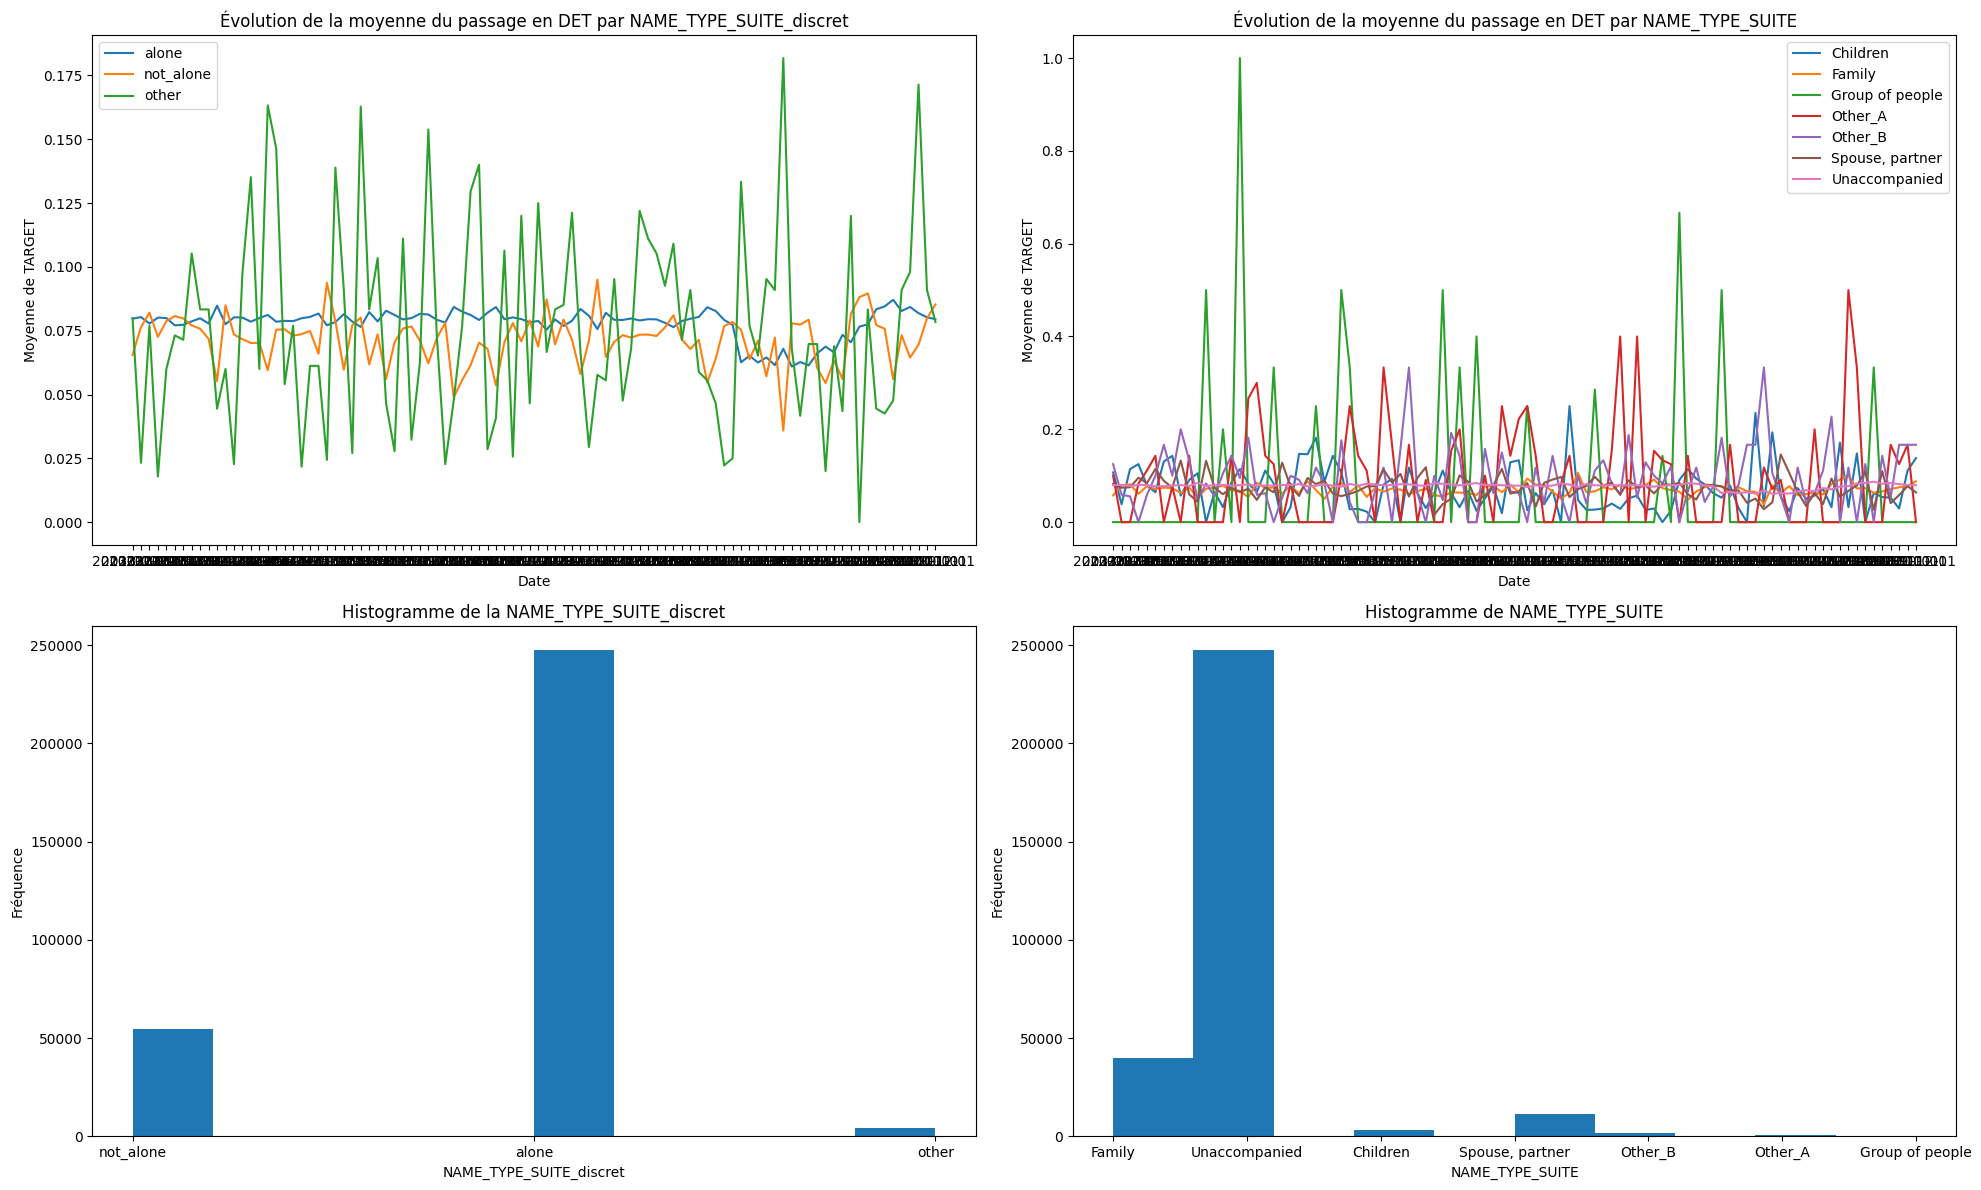

In [578]:
import matplotlib.pyplot as plt

# Création d'une grille de subplots avec 2 lignes et 2 colonnes
# Les deux premiers subplots (en haut) pour les courbes, et le troisième (en bas à gauche) pour l'histogramme
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))

for idx, col in enumerate(data[['NAME_TYPE_SUITE_discret', 'NAME_TYPE_SUITE']].columns):
    result = data.groupby([col, 'date_mensuelle'])['TARGET'].mean().reset_index()
   
    for genre, group in result.groupby(col):
        axes[0, idx].plot(group['date_mensuelle'], group['TARGET'], label=genre)
    
    axes[0, idx].legend()
    axes[0, idx].set_xlabel('Date')
    axes[0, idx].set_ylabel('Moyenne de TARGET')
    axes[0, idx].set_title(f'Évolution de la moyenne du passage en DET par {col}')

# Histogramme pour la 'NAME_TYPE_SUITE_discret' dans le troisième subplot (en bas à gauche)
axes[1, 0].hist(data["NAME_TYPE_SUITE_discret"])
axes[1, 0].set_title('Histogramme de la NAME_TYPE_SUITE_discret')
axes[1, 0].set_xlabel('NAME_TYPE_SUITE_discret')
axes[1, 0].set_ylabel('Fréquence')

# Histogramme pour 'WALLSMATERIAL_MODE' dans le quatrième subplot (en bas à droite)
axes[1, 1].hist(data["NAME_TYPE_SUITE"].dropna())  # Utilisez dropna() pour exclure les valeurs NaN
axes[1, 1].set_title('Histogramme de NAME_TYPE_SUITE')
axes[1, 1].set_xlabel('NAME_TYPE_SUITE')
axes[1, 1].set_ylabel('Fréquence')
plt.tight_layout()
plt.show()


## NAME_INCOME_TYPE

In [579]:
list_mean = []
for cat in data['NAME_INCOME_TYPE'].unique():
    moyenne = data[data['NAME_INCOME_TYPE']==cat]['TARGET'].mean()
    list_mean.append(moyenne)
    
motif = pd.DataFrame(list_mean, columns=['moyenne'])
motif['INCOME'] = data['NAME_INCOME_TYPE'].unique()
motif.sort_values(ascending=False, by = 'moyenne', inplace=True)
motif.dropna(inplace=True)
motif.reset_index(drop=True, inplace=True)
motif

moyenne                INCOME
0  0.400000       Maternity leave
1  0.363636            Unemployed
2  0.091305               Working
3  0.070689  Commercial associate
4  0.054736         State servant
5  0.051256             Pensioner
6  0.000000               Student
7  0.000000           Businessman

In [580]:
low_income = ['Maternity leave' , 'Unemployed']
high_income = ["Working", "Commercial associate", "Businessman"]
other = ['State servant', 'Pensioner', 'Student']

data['NAME_INCOME_TYPE_discret'] = np.select(
    [
        data['NAME_INCOME_TYPE'].isin(low_income),
        data['NAME_INCOME_TYPE'].isin(high_income),
        data['NAME_INCOME_TYPE'].isin(other)
    ],
    ['low_income', 'high_income', 'other'],
    default='other')

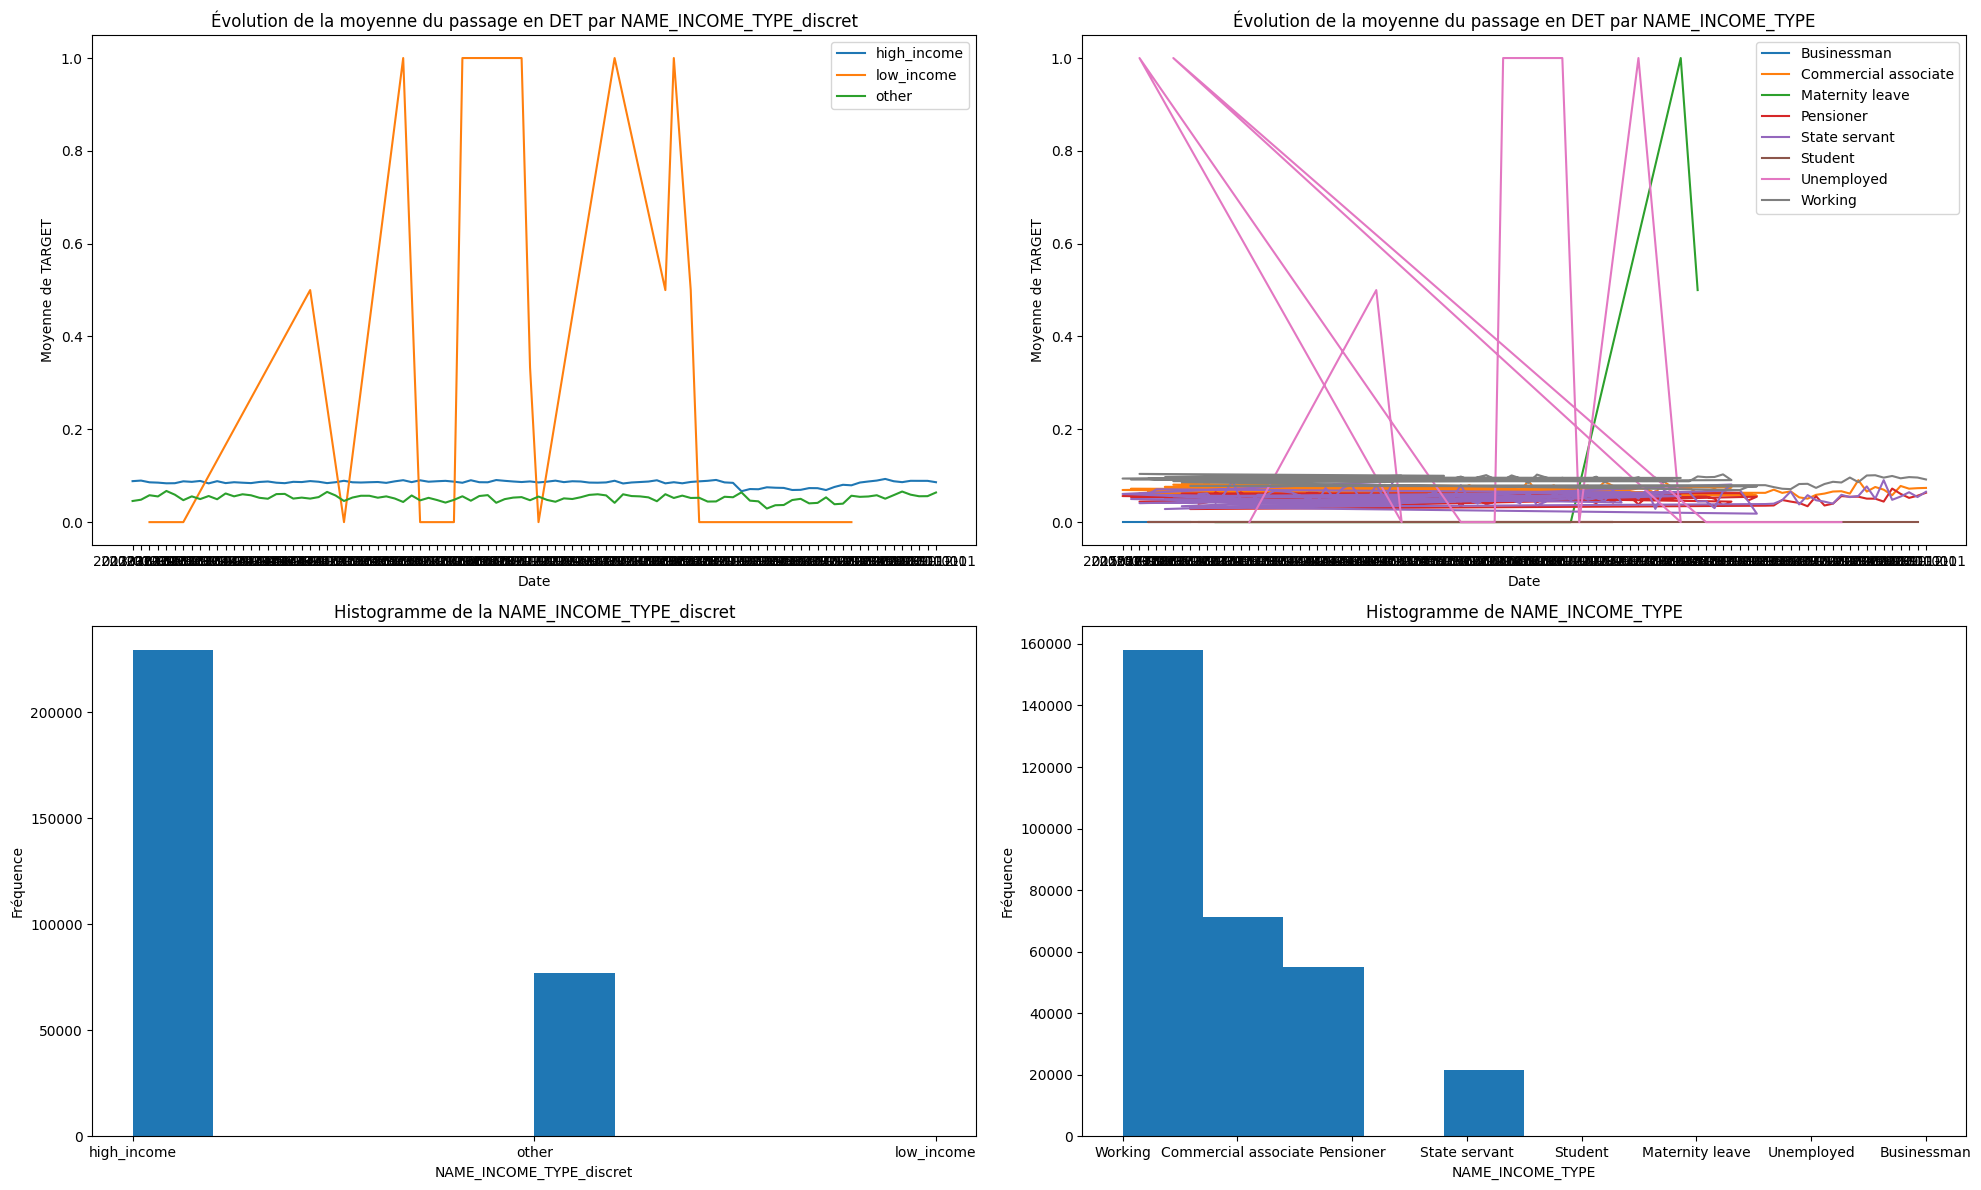

In [581]:
import matplotlib.pyplot as plt

# Création d'une grille de subplots avec 2 lignes et 2 colonnes
# Les deux premiers subplots (en haut) pour les courbes, et le troisième (en bas à gauche) pour l'histogramme
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))

for idx, col in enumerate(data[['NAME_INCOME_TYPE_discret', 'NAME_INCOME_TYPE']].columns):
    result = data.groupby([col, 'date_mensuelle'])['TARGET'].mean().reset_index()
   
    for genre, group in result.groupby(col):
        axes[0, idx].plot(group['date_mensuelle'], group['TARGET'], label=genre)
    
    axes[0, idx].legend()
    axes[0, idx].set_xlabel('Date')
    axes[0, idx].set_ylabel('Moyenne de TARGET')
    axes[0, idx].set_title(f'Évolution de la moyenne du passage en DET par {col}')

# Histogramme pour la 'Situation' dans le troisième subplot (en bas à gauche)
axes[1, 0].hist(data["NAME_INCOME_TYPE_discret"])
axes[1, 0].set_title('Histogramme de la NAME_INCOME_TYPE_discret')
axes[1, 0].set_xlabel('NAME_INCOME_TYPE_discret')
axes[1, 0].set_ylabel('Fréquence')

# Histogramme pour 'WALLSMATERIAL_MODE' dans le quatrième subplot (en bas à droite)
axes[1, 1].hist(data["NAME_INCOME_TYPE"].dropna())  # Utilisez dropna() pour exclure les valeurs NaN
axes[1, 1].set_title('Histogramme de NAME_INCOME_TYPE')
axes[1, 1].set_xlabel('NAME_INCOME_TYPE')
axes[1, 1].set_ylabel('Fréquence')

plt.tight_layout()
plt.show()


## NAME_EDUCATION_TYPE

In [582]:
list_mean = []
for cat in data['NAME_EDUCATION_TYPE'].unique():
    moyenne = data[data['NAME_EDUCATION_TYPE']==cat]['TARGET'].mean()
    list_mean.append(moyenne)
    
motif = pd.DataFrame(list_mean, columns=['moyenne'])
motif['education'] = data['NAME_EDUCATION_TYPE'].unique()
motif.sort_values(ascending=False, by = 'moyenne', inplace=True)
motif.dropna(inplace=True)
motif.reset_index(drop=True, inplace=True)
motif

moyenne                      education
0  0.105554                Lower secondary
1  0.084983  Secondary / secondary special
2  0.079926              Incomplete higher
3  0.050863               Higher education
4  0.018293                Academic degree

In [583]:
lower = ["Lower_education", "Secondary / secondary special", "Incomplete higher"]
higher = ["Higher education", "Academic degree"]


data['NAME_EDUCATION_TYPE_discret'] = np.select(
    [
        data['NAME_EDUCATION_TYPE'].isin(lower),
        data['NAME_EDUCATION_TYPE'].isin(higher),
        # data['NAME_EDUCATION_TYPE'].isin(unknown)
    ],
    ['lower', 'higher'],
    default='lower')

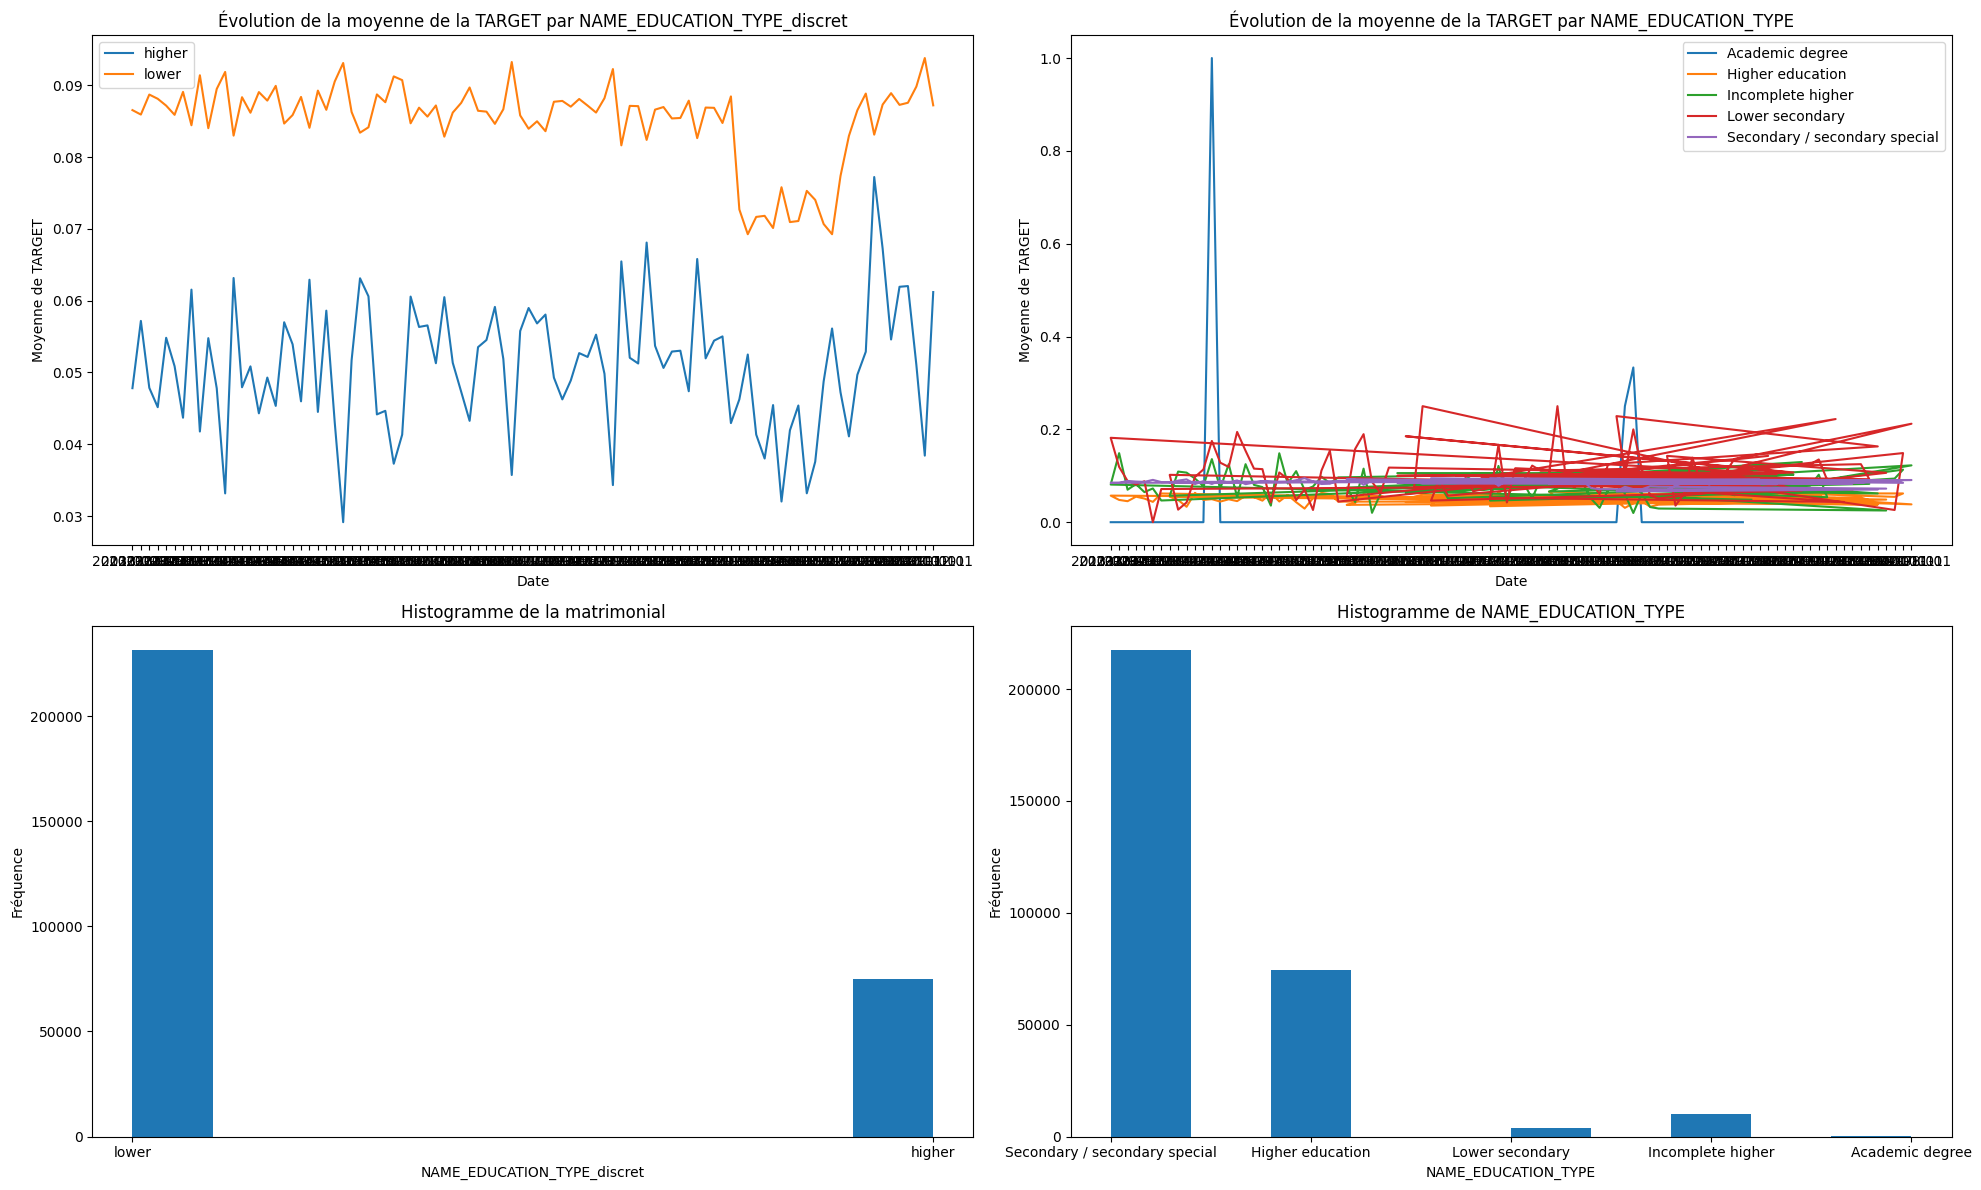

In [584]:
import matplotlib.pyplot as plt

# Création d'une grille de subplots avec 2 lignes et 2 colonnes
# Les deux premiers subplots (en haut) pour les courbes, et le troisième (en bas à gauche) pour l'histogramme
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))

for idx, col in enumerate(data[['NAME_EDUCATION_TYPE_discret', 'NAME_EDUCATION_TYPE']].columns):
    result = data.groupby([col, 'date_mensuelle'])['TARGET'].mean().reset_index()
   
    for genre, group in result.groupby(col):
        axes[0, idx].plot(group['date_mensuelle'], group['TARGET'], label=genre)
    
    axes[0, idx].legend()
    axes[0, idx].set_xlabel('Date')
    axes[0, idx].set_ylabel('Moyenne de TARGET')
    axes[0, idx].set_title(f'Évolution de la moyenne de la TARGET par {col}')

# Histogramme pour la 'Skilled' dans le troisième subplot (en bas à gauche)
axes[1, 0].hist(data["NAME_EDUCATION_TYPE_discret"])
axes[1, 0].set_title('Histogramme de la matrimonial')
axes[1, 0].set_xlabel('NAME_EDUCATION_TYPE_discret')
axes[1, 0].set_ylabel('Fréquence')

# Histogramme pour 'WALLSMATERIAL_MODE' dans le quatrième subplot (en bas à droite)
axes[1, 1].hist(data["NAME_EDUCATION_TYPE"].dropna())  # Utilisez dropna() pour exclure les valeurs NaN
axes[1, 1].set_title('Histogramme de NAME_EDUCATION_TYPE')
axes[1, 1].set_xlabel('NAME_EDUCATION_TYPE')
axes[1, 1].set_ylabel('Fréquence')

plt.tight_layout()
plt.show()


## NAME_FAMILY_STATUS

In [585]:
list_mean = []
for cat in data['NAME_FAMILY_STATUS'].unique():
    moyenne = data[data['NAME_FAMILY_STATUS']==cat]['TARGET'].mean()
    list_mean.append(moyenne)
    
motif = pd.DataFrame(list_mean, columns=['moyenne'])
motif['family'] = data['NAME_FAMILY_STATUS'].unique()
motif.sort_values(ascending=False, by = 'moyenne', inplace=True)
motif.dropna(inplace=True)
motif.reset_index(drop=True, inplace=True)
motif

moyenne                family
0  0.094162        Civil marriage
1  0.093574  Single / not married
2  0.078462             Separated
3  0.071720               Married
4  0.055784                 Widow
5  0.000000               Unknown

In [586]:
alone = ["Single / not married", "Separated","Widow", "Security staff", "Laborers"]
couple = ["Civil marriage", "Married"]
unknown = ["Unknown"]


data['NAME_FAMILY_STATUS_discret'] = np.select(
    [
        data['NAME_FAMILY_STATUS'].isin(alone),
        data['NAME_FAMILY_STATUS'].isin(couple),
        data['NAME_FAMILY_STATUS'].isin(unknown)
    ],
    ['alone', 'couple', 'unknown'],
    default='couple')

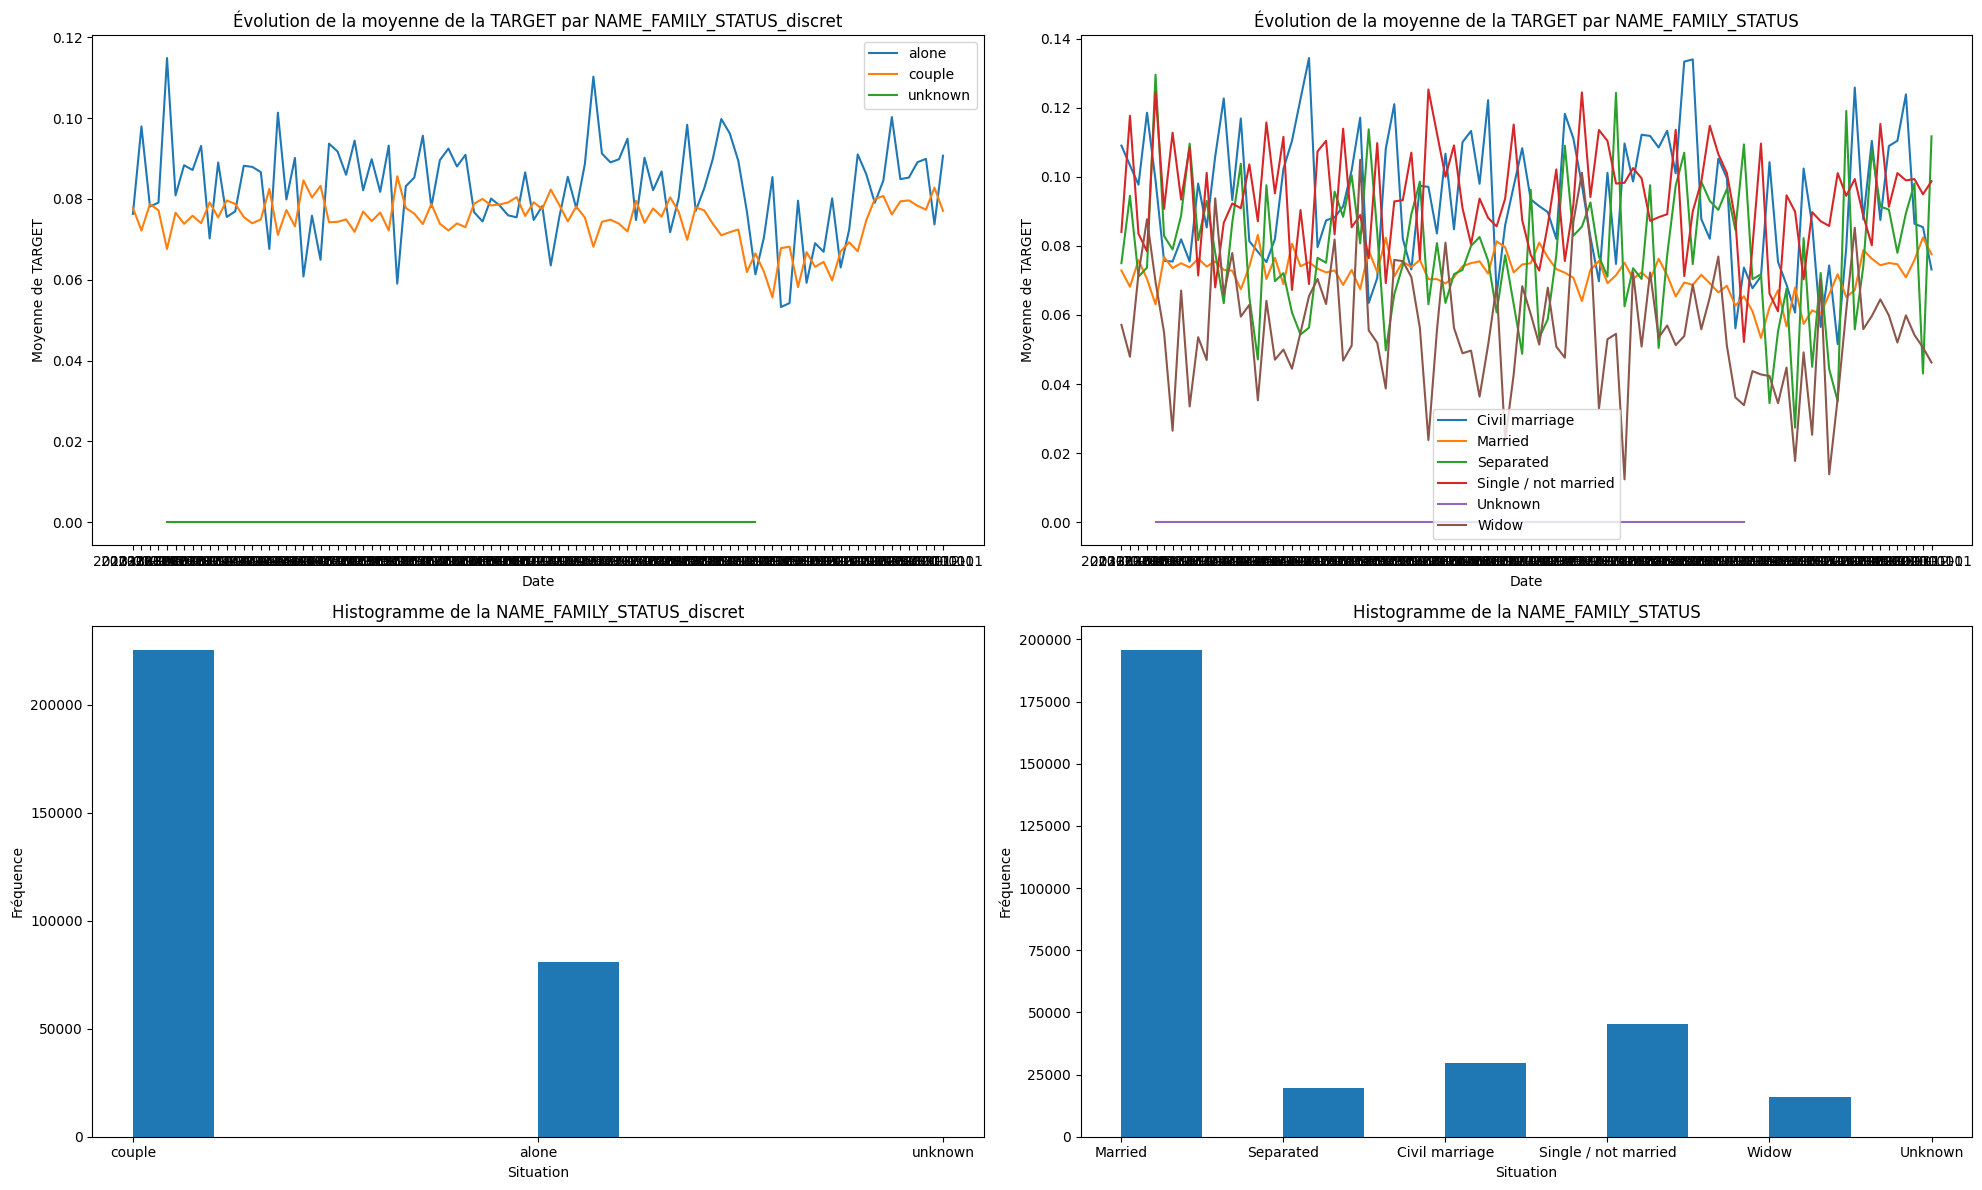

In [587]:
import matplotlib.pyplot as plt

# Création d'une grille de subplots avec 2 lignes et 2 colonnes
# Les deux premiers subplots (en haut) pour les courbes, et le troisième (en bas à gauche) pour l'histogramme
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))

for idx, col in enumerate(data[['NAME_FAMILY_STATUS_discret', 'NAME_FAMILY_STATUS']].columns):
    result = data.groupby([col, 'date_mensuelle'])['TARGET'].mean().reset_index()
   
    for genre, group in result.groupby(col):
        axes[0, idx].plot(group['date_mensuelle'], group['TARGET'], label=genre)
    
    axes[0, idx].legend()
    axes[0, idx].set_xlabel('Date')
    axes[0, idx].set_ylabel('Moyenne de TARGET')
    axes[0, idx].set_title(f'Évolution de la moyenne de la TARGET par {col}')

# Histogramme pour la 'Skilled' dans le troisième subplot (en bas à gauche)
axes[1, 0].hist(data["NAME_FAMILY_STATUS_discret"])
axes[1, 0].set_title('Histogramme de la NAME_FAMILY_STATUS_discret')
axes[1, 0].set_xlabel('Situation')
axes[1, 0].set_ylabel('Fréquence')

axes[1, 1].hist(data["NAME_FAMILY_STATUS"].dropna())
axes[1, 1].set_title('Histogramme de la NAME_FAMILY_STATUS')
axes[1, 1].set_xlabel('Situation')
axes[1, 1].set_ylabel('Fréquence')

plt.tight_layout()
plt.show()


## OCCUPATION_TYPE

In [588]:
list_mean = []
for cat in data['OCCUPATION_TYPE'].unique():
    moyenne = data[data['OCCUPATION_TYPE']==cat]['TARGET'].mean()
    list_mean.append(moyenne)
    
motif = pd.DataFrame(list_mean, columns=['moyenne'])
motif['family'] = data['OCCUPATION_TYPE'].unique()
motif.sort_values(ascending=False, by = 'moyenne', inplace=True)
motif.dropna(inplace=True)
motif.reset_index(drop=True, inplace=True)
motif

moyenne                 family
0   0.163127     Low-skill Laborers
1   0.107811                Drivers
2   0.105460   Waiters/barmen staff
3   0.101827         Security staff
4   0.100789               Laborers
5   0.099797          Cooking staff
6   0.091405            Sales staff
7   0.090240         Cleaning staff
8   0.074866          Realty agents
9   0.066923            Secretaries
10  0.063720         Medicine staff
11  0.062857               IT staff
12  0.062098  Private service staff
13  0.059924             Core staff
14  0.059155               Managers
15  0.058929               HR staff
16  0.057811  High skill tech staff
17  0.045589            Accountants

In [589]:
low_skilled = ["Low-skill Laborers", "Drivers","Waiters/barmen staff", "Security staff", "Laborers"]
middle_skilled = ["Sales staff", "Cooking staff", "Cleaning staff", "Realty agents", "Secretaries"]
high_skilled = ["Medicine staff", "IT staff", "Private service staff", "Managers", "Core staff", "HR staff", "Accountants", "High skilled tech staff"]


data['OCCUPATION_TYPE_discret'] = np.select(
    [
        data['OCCUPATION_TYPE'].isin(low_skilled),
        data['OCCUPATION_TYPE'].isin(middle_skilled),
        data['OCCUPATION_TYPE'].isin(high_skilled)
    ],
    ['low_skilled', 'middle_skilled', 'high_skilled'],
    default='middle_skilled')

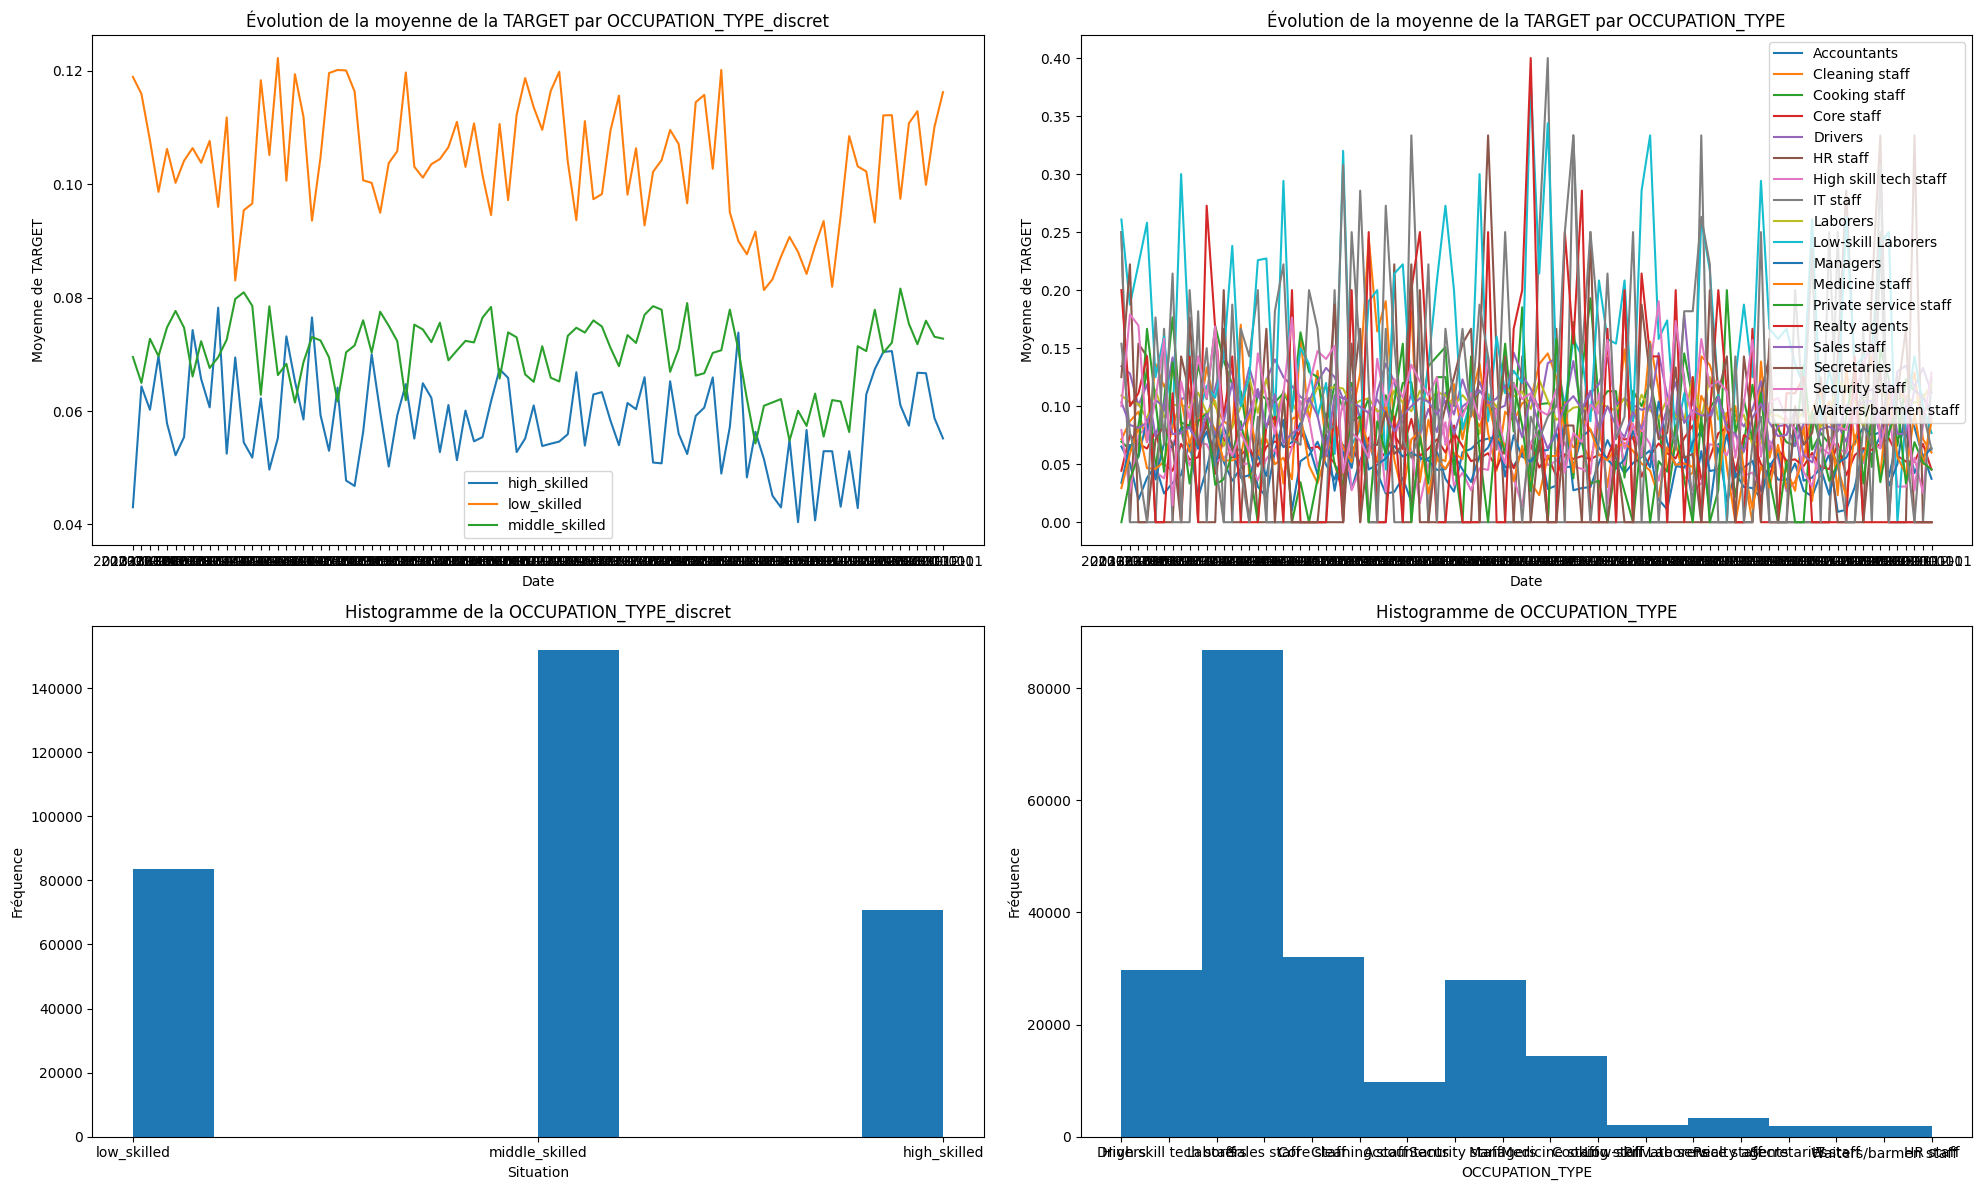

In [590]:
import matplotlib.pyplot as plt

# Création d'une grille de subplots avec 2 lignes et 2 colonnes
# Les deux premiers subplots (en haut) pour les courbes, et le troisième (en bas à gauche) pour l'histogramme
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))

for idx, col in enumerate(data[['OCCUPATION_TYPE_discret', 'OCCUPATION_TYPE']].columns):
    result = data.groupby([col, 'date_mensuelle'])['TARGET'].mean().reset_index()
   
    for genre, group in result.groupby(col):
        axes[0, idx].plot(group['date_mensuelle'], group['TARGET'], label=genre)
    
    axes[0, idx].legend()
    axes[0, idx].set_xlabel('Date')
    axes[0, idx].set_ylabel('Moyenne de TARGET')
    axes[0, idx].set_title(f'Évolution de la moyenne de la TARGET par {col}')

# Histogramme pour la 'OCCUPATION_TYPE_discret' dans le troisième subplot (en bas à gauche)
axes[1, 0].hist(data["OCCUPATION_TYPE_discret"])
axes[1, 0].set_title('Histogramme de la OCCUPATION_TYPE_discret')
axes[1, 0].set_xlabel('Situation')
axes[1, 0].set_ylabel('Fréquence')


# Histogramme pour 'WALLSMATERIAL_MODE' dans le quatrième subplot (en bas à droite)
axes[1, 1].hist(data["OCCUPATION_TYPE"].dropna())  # Utilisez dropna() pour exclure les valeurs NaN
axes[1, 1].set_title('Histogramme de OCCUPATION_TYPE')
axes[1, 1].set_xlabel('OCCUPATION_TYPE')
axes[1, 1].set_ylabel('Fréquence')

plt.tight_layout()
plt.show()


## NAME_HOUSING_TYPE

In [591]:
list_mean = []
for cat in data['NAME_HOUSING_TYPE'].unique():
    moyenne = data[data['NAME_HOUSING_TYPE']==cat]['TARGET'].mean()
    list_mean.append(moyenne)
    
motif = pd.DataFrame(list_mean, columns=['moyenne'])
motif['housing'] = data['NAME_HOUSING_TYPE'].unique()
motif.sort_values(ascending=False, by = 'moyenne', inplace=True)
motif.dropna(inplace=True)
motif.reset_index(drop=True, inplace=True)
motif

moyenne              housing
0  0.118277     Rented apartment
1  0.110772         With parents
2  0.080831  Municipal apartment
3  0.076029      Co-op apartment
4  0.074103    House / apartment
5  0.061781     Office apartment

## WEEKDAY_APPR_PROCESS_START

In [592]:
list_mean = []
for cat in data['WEEKDAY_APPR_PROCESS_START'].unique():
    moyenne = data[data['WEEKDAY_APPR_PROCESS_START']==cat]['TARGET'].mean()
    list_mean.append(moyenne)
    
motif = pd.DataFrame(list_mean, columns=['moyenne'])
motif['weekday'] = data['WEEKDAY_APPR_PROCESS_START'].unique()
motif.sort_values(ascending=False, by = 'moyenne', inplace=True)
motif.dropna(inplace=True)
motif.reset_index(drop=True, inplace=True)
motif

moyenne    weekday
0  0.080042    TUESDAY
1  0.077367  WEDNESDAY
2  0.077049     FRIDAY
3  0.076853   THURSDAY
4  0.075548     SUNDAY
5  0.075008   SATURDAY
6  0.073552     MONDAY

In [593]:
weekdays = ["MONDAY", "TUESDAY", "WEDNESDAY", "THURSDAY", "FRIDAY"]
weekends = ["SATURDAY", "SUNDAY"]

data['WEEKDAY_APPR_PROCESS_START_discret'] = np.select(
    [
        data['WEEKDAY_APPR_PROCESS_START'].isin(weekdays),
        data['WEEKDAY_APPR_PROCESS_START'].isin(weekends),
        # data['WEEKDAY_APPR_PROCESS_START'].isin(high_skilled)
    ],
    ['weekdays', 'weekends'],
    default='weekdays')

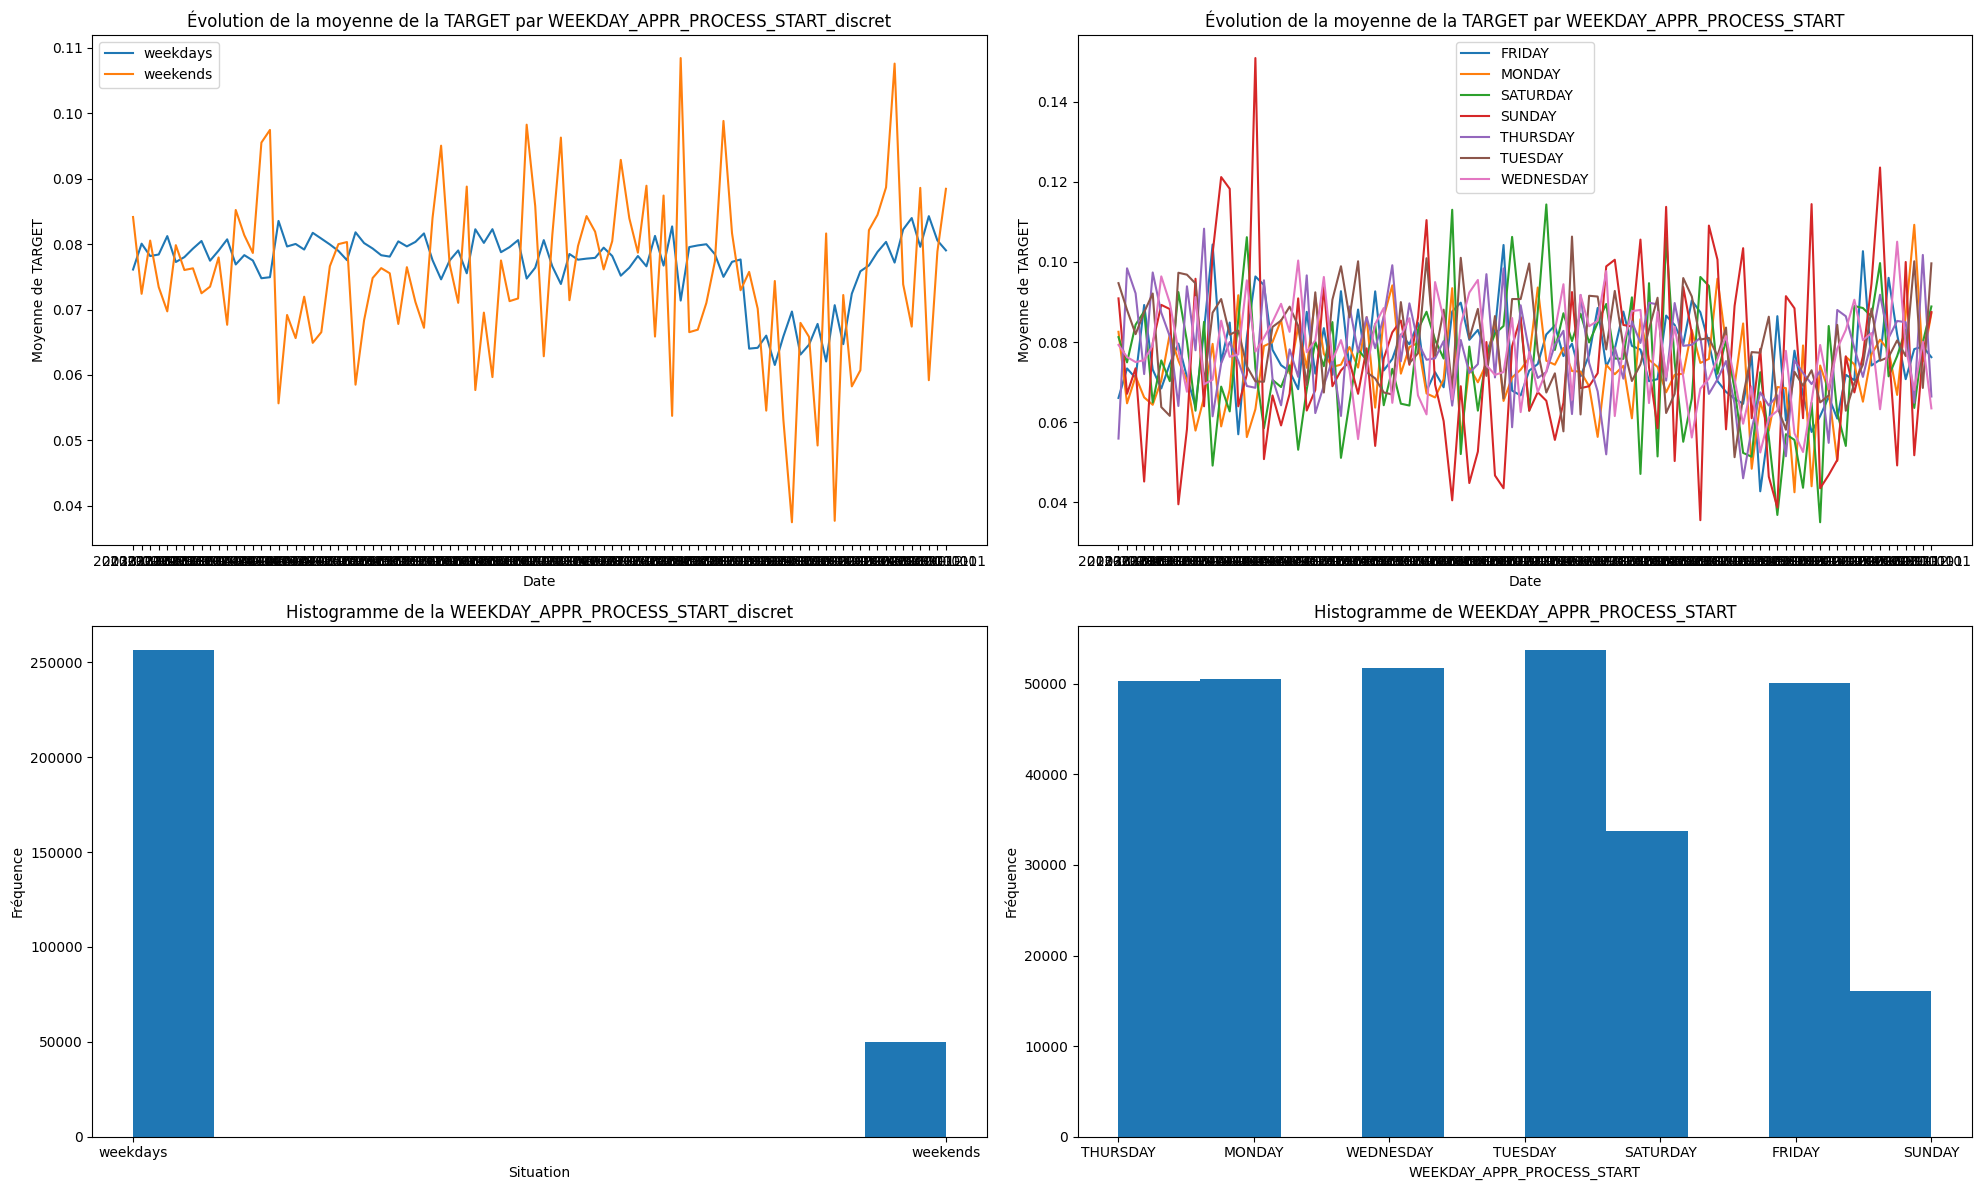

In [594]:
import matplotlib.pyplot as plt

# Création d'une grille de subplots avec 2 lignes et 2 colonnes
# Les deux premiers subplots (en haut) pour les courbes, et le troisième (en bas à gauche) pour l'histogramme
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))

for idx, col in enumerate(data[['WEEKDAY_APPR_PROCESS_START_discret', 'WEEKDAY_APPR_PROCESS_START']].columns):
    result = data.groupby([col, 'date_mensuelle'])['TARGET'].mean().reset_index()
   
    for genre, group in result.groupby(col):
        axes[0, idx].plot(group['date_mensuelle'], group['TARGET'], label=genre)
    
    axes[0, idx].legend()
    axes[0, idx].set_xlabel('Date')
    axes[0, idx].set_ylabel('Moyenne de TARGET')
    axes[0, idx].set_title(f'Évolution de la moyenne de la TARGET par {col}')

# Histogramme pour la 'WEEKDAY_APPR_PROCESS_START_discret' dans le troisième subplot (en bas à gauche)
axes[1, 0].hist(data["WEEKDAY_APPR_PROCESS_START_discret"])
axes[1, 0].set_title('Histogramme de la WEEKDAY_APPR_PROCESS_START_discret')
axes[1, 0].set_xlabel('Situation')
axes[1, 0].set_ylabel('Fréquence')

axes[1, 1].hist(data["WEEKDAY_APPR_PROCESS_START"].dropna())  # Utilisez dropna() pour exclure les valeurs NaN
axes[1, 1].set_title('Histogramme de WEEKDAY_APPR_PROCESS_START')
axes[1, 1].set_xlabel('WEEKDAY_APPR_PROCESS_START')
axes[1, 1].set_ylabel('Fréquence')

plt.tight_layout()
plt.show()


## FONDKAPREMONT_MODE

In [595]:
list_mean = []
for cat in data['FONDKAPREMONT_MODE'].unique():
    moyenne = data[data['FONDKAPREMONT_MODE']==cat]['TARGET'].mean()
    list_mean.append(moyenne)
    
motif = pd.DataFrame(list_mean, columns=['moyenne'])
motif['fondkapremont'] = data['FONDKAPREMONT_MODE'].unique()
motif.sort_values(ascending=False, by = 'moyenne', inplace=True)
motif.dropna(inplace=True)
motif.reset_index(drop=True, inplace=True)
motif

moyenne          fondkapremont
0  0.072525          not specified
1  0.066343       reg oper account
2  0.062157  reg oper spec account
3  0.054841       org spec account

In [596]:
not_specified = ['not specified']
reg = ["reg oper account", "reg oper spec account", "org spec account"]  
# not_alone = ['Spouse, partner', 'Family', 'Children']

data['FONDKAPREMONT_MODE_discret'] = np.select(
    [
        data['FONDKAPREMONT_MODE'].isin(not_specified),
        data['FONDKAPREMONT_MODE'].isin(reg),
        # data['NAME_TYPE_SUITE'].isin(not_alone)
    ],
    ['not_specified', 'reg'],
    default='not_specified')

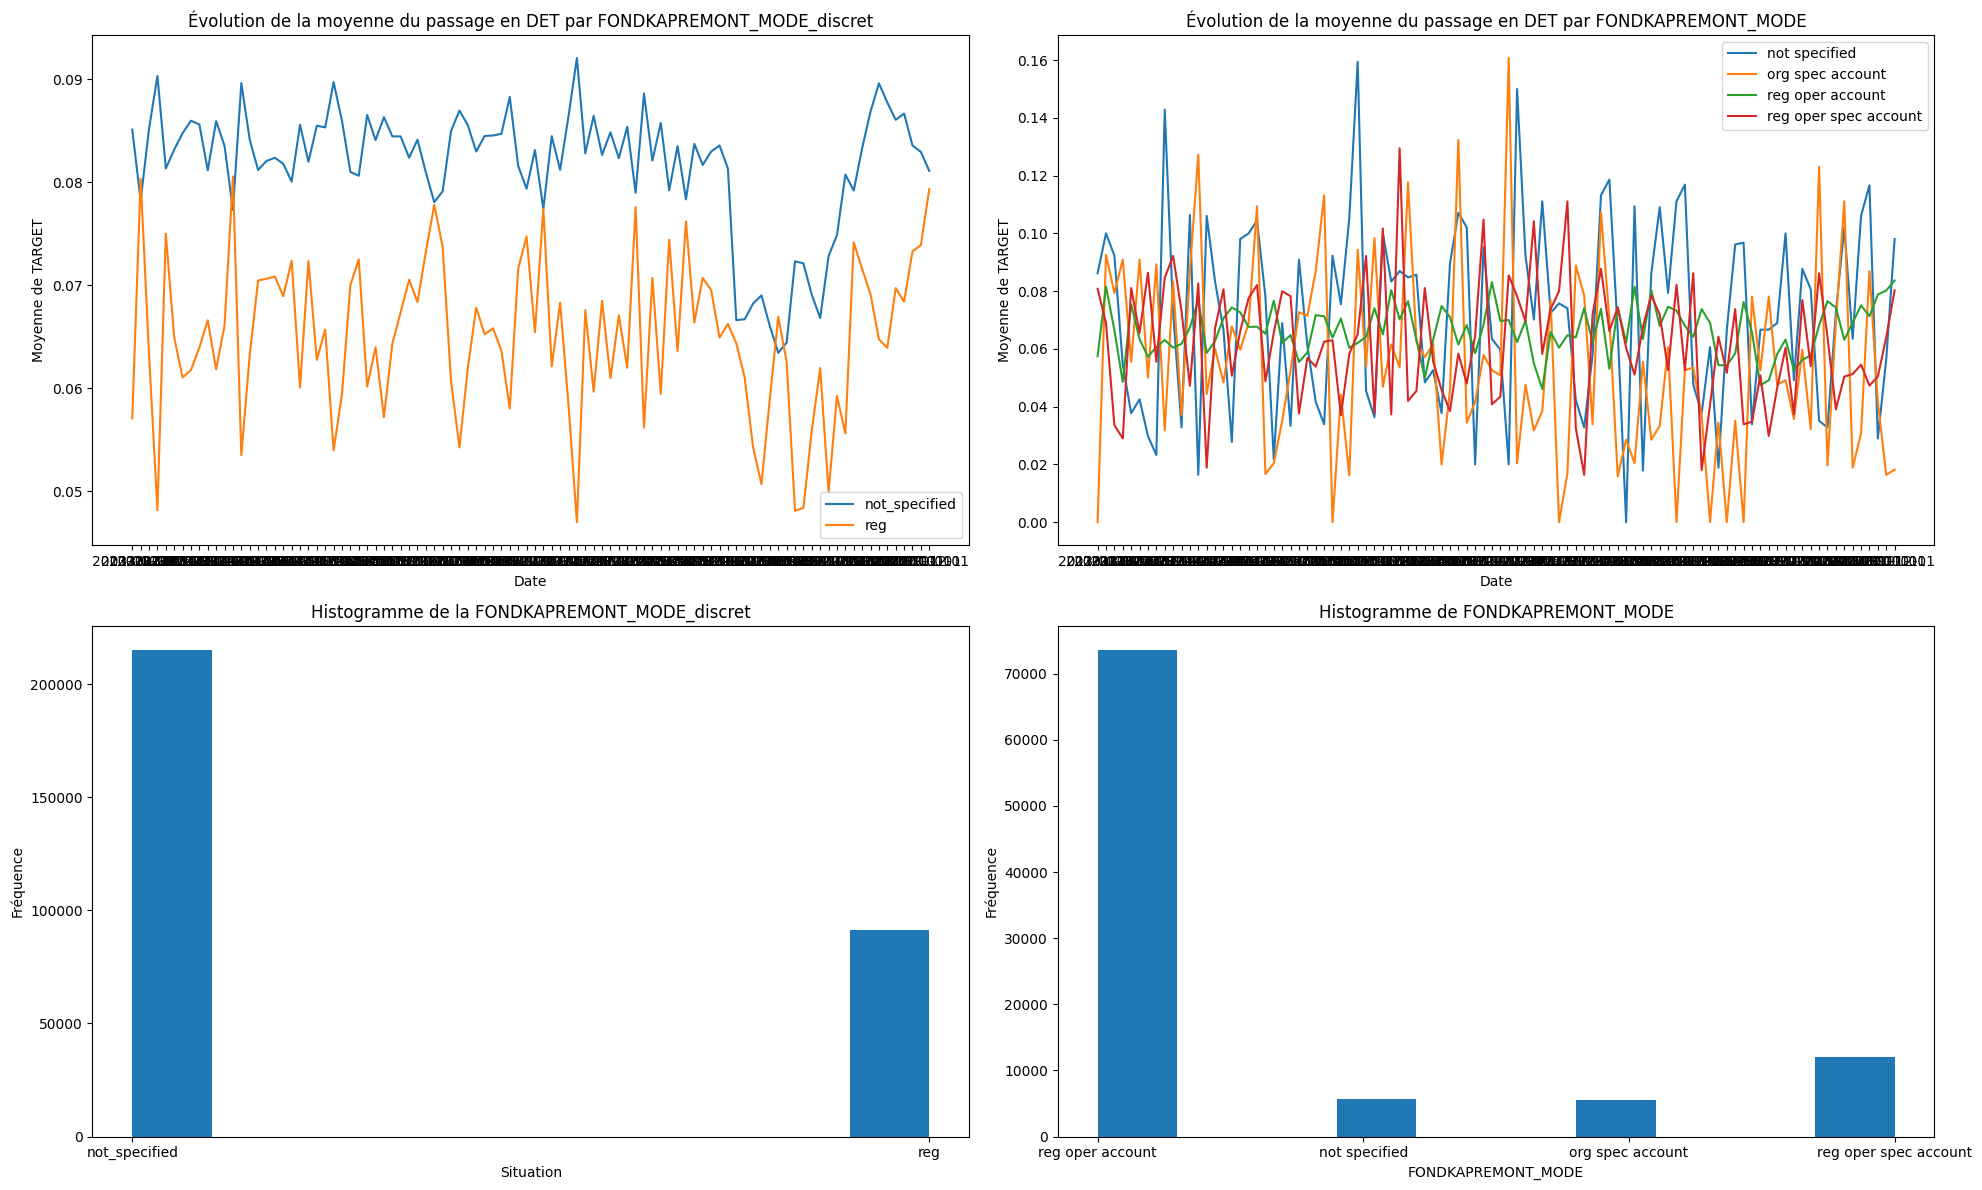

In [597]:
import matplotlib.pyplot as plt

# Création d'une grille de subplots avec 2 lignes et 2 colonnes
# Les deux premiers subplots (en haut) pour les courbes, et le troisième (en bas à gauche) pour l'histogramme
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))

for idx, col in enumerate(data[['FONDKAPREMONT_MODE_discret', 'FONDKAPREMONT_MODE']].columns):
    result = data.groupby([col, 'date_mensuelle'])['TARGET'].mean().reset_index()
   
    for genre, group in result.groupby(col):
        axes[0, idx].plot(group['date_mensuelle'], group['TARGET'], label=genre)
    
    axes[0, idx].legend()
    axes[0, idx].set_xlabel('Date')
    axes[0, idx].set_ylabel('Moyenne de TARGET')
    axes[0, idx].set_title(f'Évolution de la moyenne du passage en DET par {col}')

# Histogramme pour la 'fondkapremont' dans le troisième subplot (en bas à gauche)
axes[1, 0].hist(data["FONDKAPREMONT_MODE_discret"])
axes[1, 0].set_title('Histogramme de la FONDKAPREMONT_MODE_discret')
axes[1, 0].set_xlabel('Situation')
axes[1, 0].set_ylabel('Fréquence')


axes[1, 1].hist(data["FONDKAPREMONT_MODE"].dropna())  # Utilisez dropna() pour exclure les valeurs NaN
axes[1, 1].set_title('Histogramme de FONDKAPREMONT_MODE')
axes[1, 1].set_xlabel('FONDKAPREMONT_MODE')
axes[1, 1].set_ylabel('Fréquence')
plt.tight_layout()
plt.show()


## HOUSETYPE_MODE

In [598]:
list_mean = []
for cat in data['HOUSETYPE_MODE'].unique():
    moyenne = data[data['HOUSETYPE_MODE']==cat]['TARGET'].mean()
    list_mean.append(moyenne)
    
motif = pd.DataFrame(list_mean, columns=['moyenne'])
motif['HOUSETYPE'] = data['HOUSETYPE_MODE'].unique()
motif.sort_values(ascending=False, by = 'moyenne', inplace=True)
motif.dropna(inplace=True)
motif.reset_index(drop=True, inplace=True)
motif

moyenne         HOUSETYPE
0  0.095366  specific housing
1  0.077371    terraced house
2  0.066041    block of flats

In [599]:
houses = ['specific housing', "terraced house"]
appartment = ["block of flats"]
# other = ['State servant', 'Pensioner', 'Student']

data['HOUSETYPE_MODE_discret'] = np.select(
    [
        data['HOUSETYPE_MODE'].isin(houses),
        data['HOUSETYPE_MODE'].isin(appartment),
        # data['NAME_INCOME_TYPE'].isin(other)
    ],
    ['houses', 'appartment'],
    default='houses')

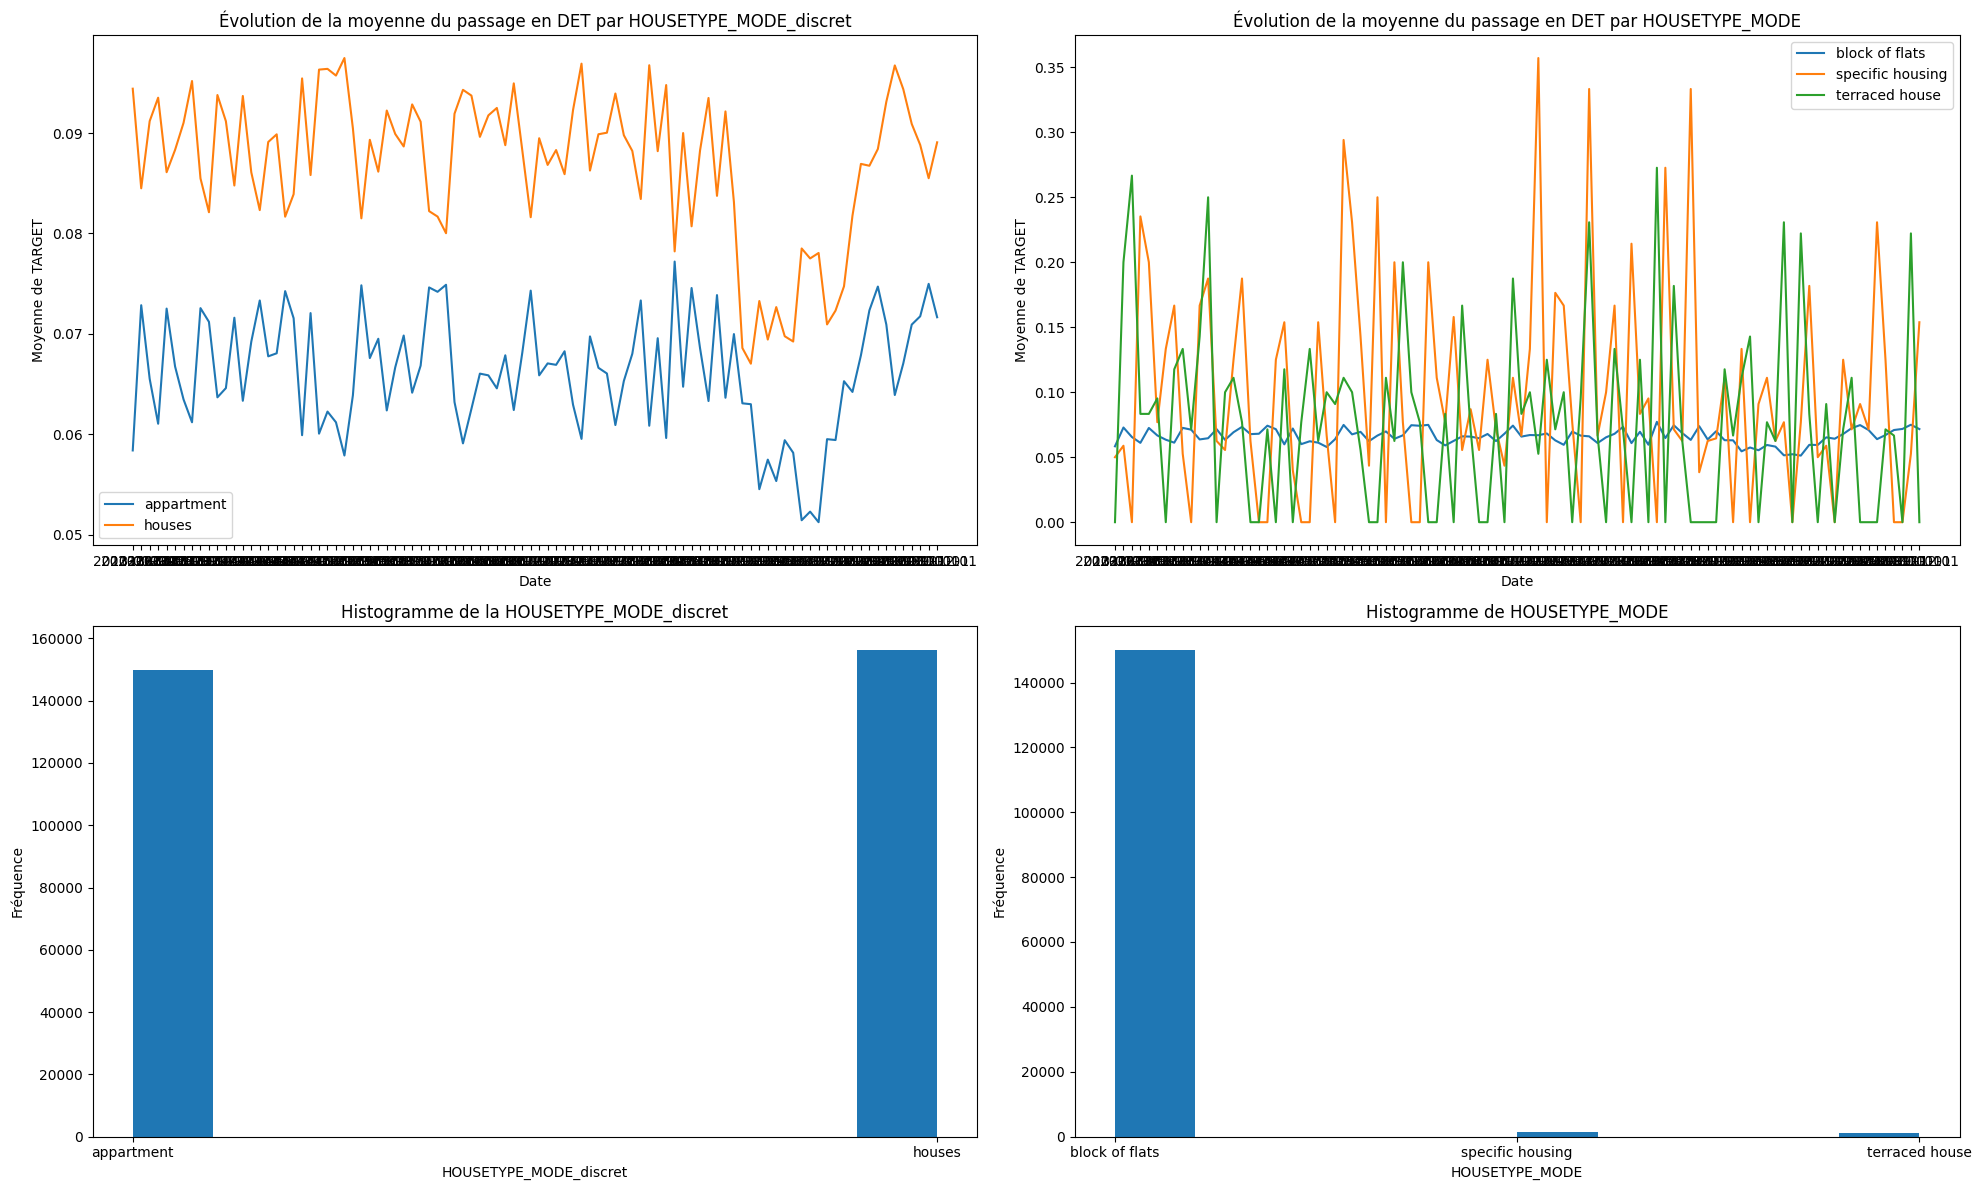

In [600]:
import matplotlib.pyplot as plt

# Création d'une grille de subplots avec 2 lignes et 2 colonnes
# Les deux premiers subplots (en haut) pour les courbes, et le troisième (en bas à gauche) pour l'histogramme
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))

for idx, col in enumerate(data[['HOUSETYPE_MODE_discret', 'HOUSETYPE_MODE']].columns):
    result = data.groupby([col, 'date_mensuelle'])['TARGET'].mean().reset_index()
   
    for genre, group in result.groupby(col):
        axes[0, idx].plot(group['date_mensuelle'], group['TARGET'], label=genre)
    
    axes[0, idx].legend()
    axes[0, idx].set_xlabel('Date')
    axes[0, idx].set_ylabel('Moyenne de TARGET')
    axes[0, idx].set_title(f'Évolution de la moyenne du passage en DET par {col}')

# Histogramme pour la 'Situation' dans le troisième subplot (en bas à gauche)
axes[1, 0].hist(data["HOUSETYPE_MODE_discret"])
axes[1, 0].set_title('Histogramme de la HOUSETYPE_MODE_discret')
axes[1, 0].set_xlabel('HOUSETYPE_MODE_discret')
axes[1, 0].set_ylabel('Fréquence')

axes[1, 1].hist(data["HOUSETYPE_MODE"].dropna())  # Utilisez dropna() pour exclure les valeurs NaN
axes[1, 1].set_title('Histogramme de HOUSETYPE_MODE')
axes[1, 1].set_xlabel('HOUSETYPE_MODE')
axes[1, 1].set_ylabel('Fréquence')
plt.tight_layout()
plt.show()


## WALLSMATERIAL_MODE

In [601]:
list_mean = []
for cat in data['WALLSMATERIAL_MODE'].unique():
    moyenne = data[data['WALLSMATERIAL_MODE']==cat]['TARGET'].mean()
    list_mean.append(moyenne)
    
motif = pd.DataFrame(list_mean, columns=['moyenne'])
motif['WALLSMATERIAL'] = data['WALLSMATERIAL_MODE'].unique()
motif.sort_values(ascending=False, by = 'moyenne', inplace=True)
motif.dropna(inplace=True)
motif.reset_index(drop=True, inplace=True)
motif

moyenne WALLSMATERIAL
0  0.092238        Wooden
1  0.079110        Others
2  0.071304         Mixed
3  0.070500  Stone, brick
4  0.065732         Block
5  0.060187         Panel
6  0.044532    Monolithic

In [603]:
natural = ["Wooden", "Stone, brick"]
created = ["Block","Mixed", "Panel", "Monolithic", "Others"]

data['WALLSMATERIAL_MODE_discret'] = np.select(
    [
        data['WALLSMATERIAL_MODE'].isin(natural),
        data['WALLSMATERIAL_MODE'].isin(created),
    ],
    ['natural', 'created'],
    default='natural')

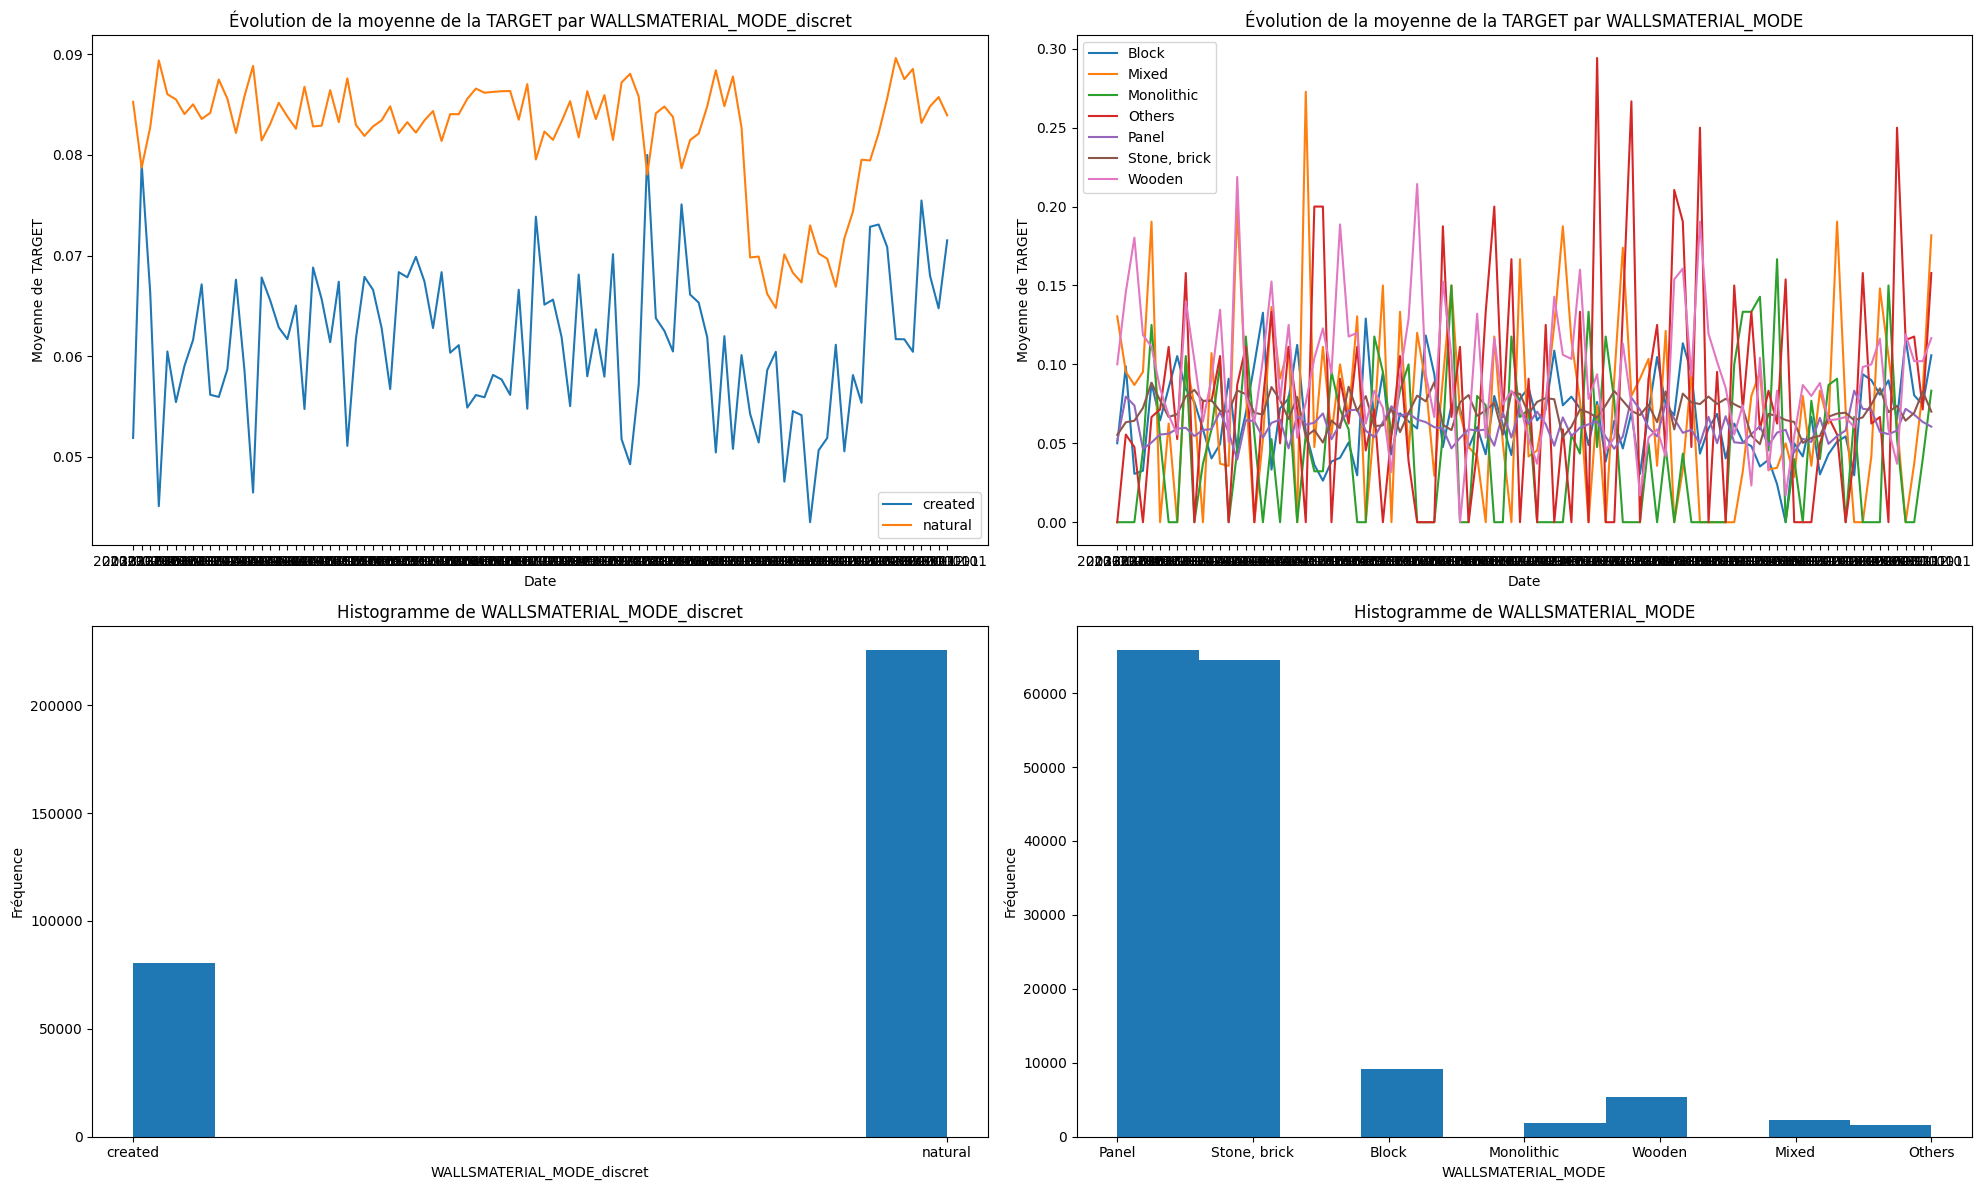

In [604]:
import matplotlib.pyplot as plt

# Création d'une grille de subplots avec 2 lignes et 2 colonnes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))

for idx, col in enumerate(data[['WALLSMATERIAL_MODE_discret', 'WALLSMATERIAL_MODE']].columns):
    result = data.groupby([col, 'date_mensuelle'])['TARGET'].mean().reset_index()
   
    for genre, group in result.groupby(col):
        axes[0, idx].plot(group['date_mensuelle'], group['TARGET'], label=genre)
    
    axes[0, idx].legend()
    axes[0, idx].set_xlabel('Date')
    axes[0, idx].set_ylabel('Moyenne de TARGET')
    axes[0, idx].set_title(f'Évolution de la moyenne de la TARGET par {col}')

# Histogramme pour 'WALLSMATERIAL_MODE_discret' dans le troisième subplot (en bas à gauche)
axes[1, 0].hist(data["WALLSMATERIAL_MODE_discret"])
axes[1, 0].set_title('Histogramme de WALLSMATERIAL_MODE_discret')
axes[1, 0].set_xlabel('WALLSMATERIAL_MODE_discret')
axes[1, 0].set_ylabel('Fréquence')

# Histogramme pour 'WALLSMATERIAL_MODE' dans le quatrième subplot (en bas à droite)
axes[1, 1].hist(data["WALLSMATERIAL_MODE"].dropna())  # Utilisez dropna() pour exclure les valeurs NaN
axes[1, 1].set_title('Histogramme de WALLSMATERIAL_MODE')
axes[1, 1].set_xlabel('WALLSMATERIAL_MODE')
axes[1, 1].set_ylabel('Fréquence')

plt.tight_layout()
plt.show()


## ORGANIZATION_TYPE

In [605]:
list_mean = []
for cat in data['ORGANIZATION_TYPE'].unique():
    moyenne = data[data['ORGANIZATION_TYPE']==cat]['TARGET'].mean()
    list_mean.append(moyenne)
    
motif = pd.DataFrame(list_mean, columns=['moyenne'])
motif['ORGANIZATION'] = data['ORGANIZATION_TYPE'].unique()
motif.sort_values(ascending=False, by = 'moyenne', inplace=True)
motif.dropna(inplace=True)
motif.reset_index(drop=True, inplace=True)
motif

moyenne            ORGANIZATION
0   0.149660       Transport: type 3
1   0.125000        Industry: type 8
2   0.121212       Industry: type 13
3   0.111173              Restaurant
4   0.109260            Construction
5   0.106383        Industry: type 1
6   0.104651                Cleaning
7   0.101523                 Realtor
8   0.100706        Industry: type 3
9   0.098214           Trade: type 3
10  0.097371             Agriculture
11  0.097365        Industry: type 4
12  0.096832           Self-employed
13  0.095046                Security
14  0.089964           Trade: type 7
15  0.088343  Business Entity Type 3
16  0.087742       Transport: type 4
17  0.083815           Trade: type 1
18  0.082803                  Mobile
19  0.081784       Industry: type 11
20  0.081395                  Postal
21  0.081287  Business Entity Type 2
22  0.078020  Business Entity Type 1
23  0.077283             Advertising
24  0.076154        Industry: type 7
25  0.075658          Legal Services
26  0.075068                 Housing
27  0.074260       Transport: type 2
28  0.072886                   Other
29  0.071429        Industry: type 6
30  0.070022        Industry: type 2
31  0.069808                 Telecom
32  0.067089           Trade: type 2
33  0.066842            Kindergarten
34  0.066422              Government
35  0.066316             Electricity
36  0.065327        Industry: type 5
37  0.064862        Industry: type 9
38  0.064748               Emergency
39  0.064220       Industry: type 10
40  0.063654                Services
41  0.063278                   Hotel
42  0.062590                Medicine
43  0.061224           Trade: type 5
44  0.058824                Religion
45  0.055449                  School
46  0.055369               Insurance
47  0.052910                 Culture
48  0.051389                     XNA
49  0.049960                    Bank
50  0.048037                Military
51  0.047578                  Police
52  0.046899              University
53  0.046724     Security Ministries
54  0.040000       Transport: type 1
55  0.039872           Trade: type 6
56  0.035326       Industry: type 12
57  0.031250           Trade: type 4

In [606]:

transports = ["Transport: type 3", "Transport: type 2","Transport: type 1"]
industry = ["Industry: type 1", "Industry: type 2", "Industry: type 3", "Industry: type 4",
         "Industry: type 5", "Industry: type 6", "Industry: type 7", "Industry: type 8",
         "Industry: type 9", "Industry: type 10", "Industry: type 11", "Industry: type 12",
         "Industry: type 13"]
trade = ["Trade: type 7", "Trade: type 6", "Trade: type 5", "Trade: type 4", "Trade: type 3", "Trade: type 2", "Trade: type 1"]

cummu = transports + industry + trade

other = set(motif['ORGANIZATION'].unique()) - set(cummu)
other = list(other)

data['ORGANIZATION_TYPE_discret'] = np.select(
    [
        data['ORGANIZATION_TYPE'].isin(transports),
        data['ORGANIZATION_TYPE'].isin(industry),
        data['ORGANIZATION_TYPE'].isin(trade),
        data['ORGANIZATION_TYPE'].isin(other)
    ],
    ['transports', 'industry', "trade","other"],
    default='transports')

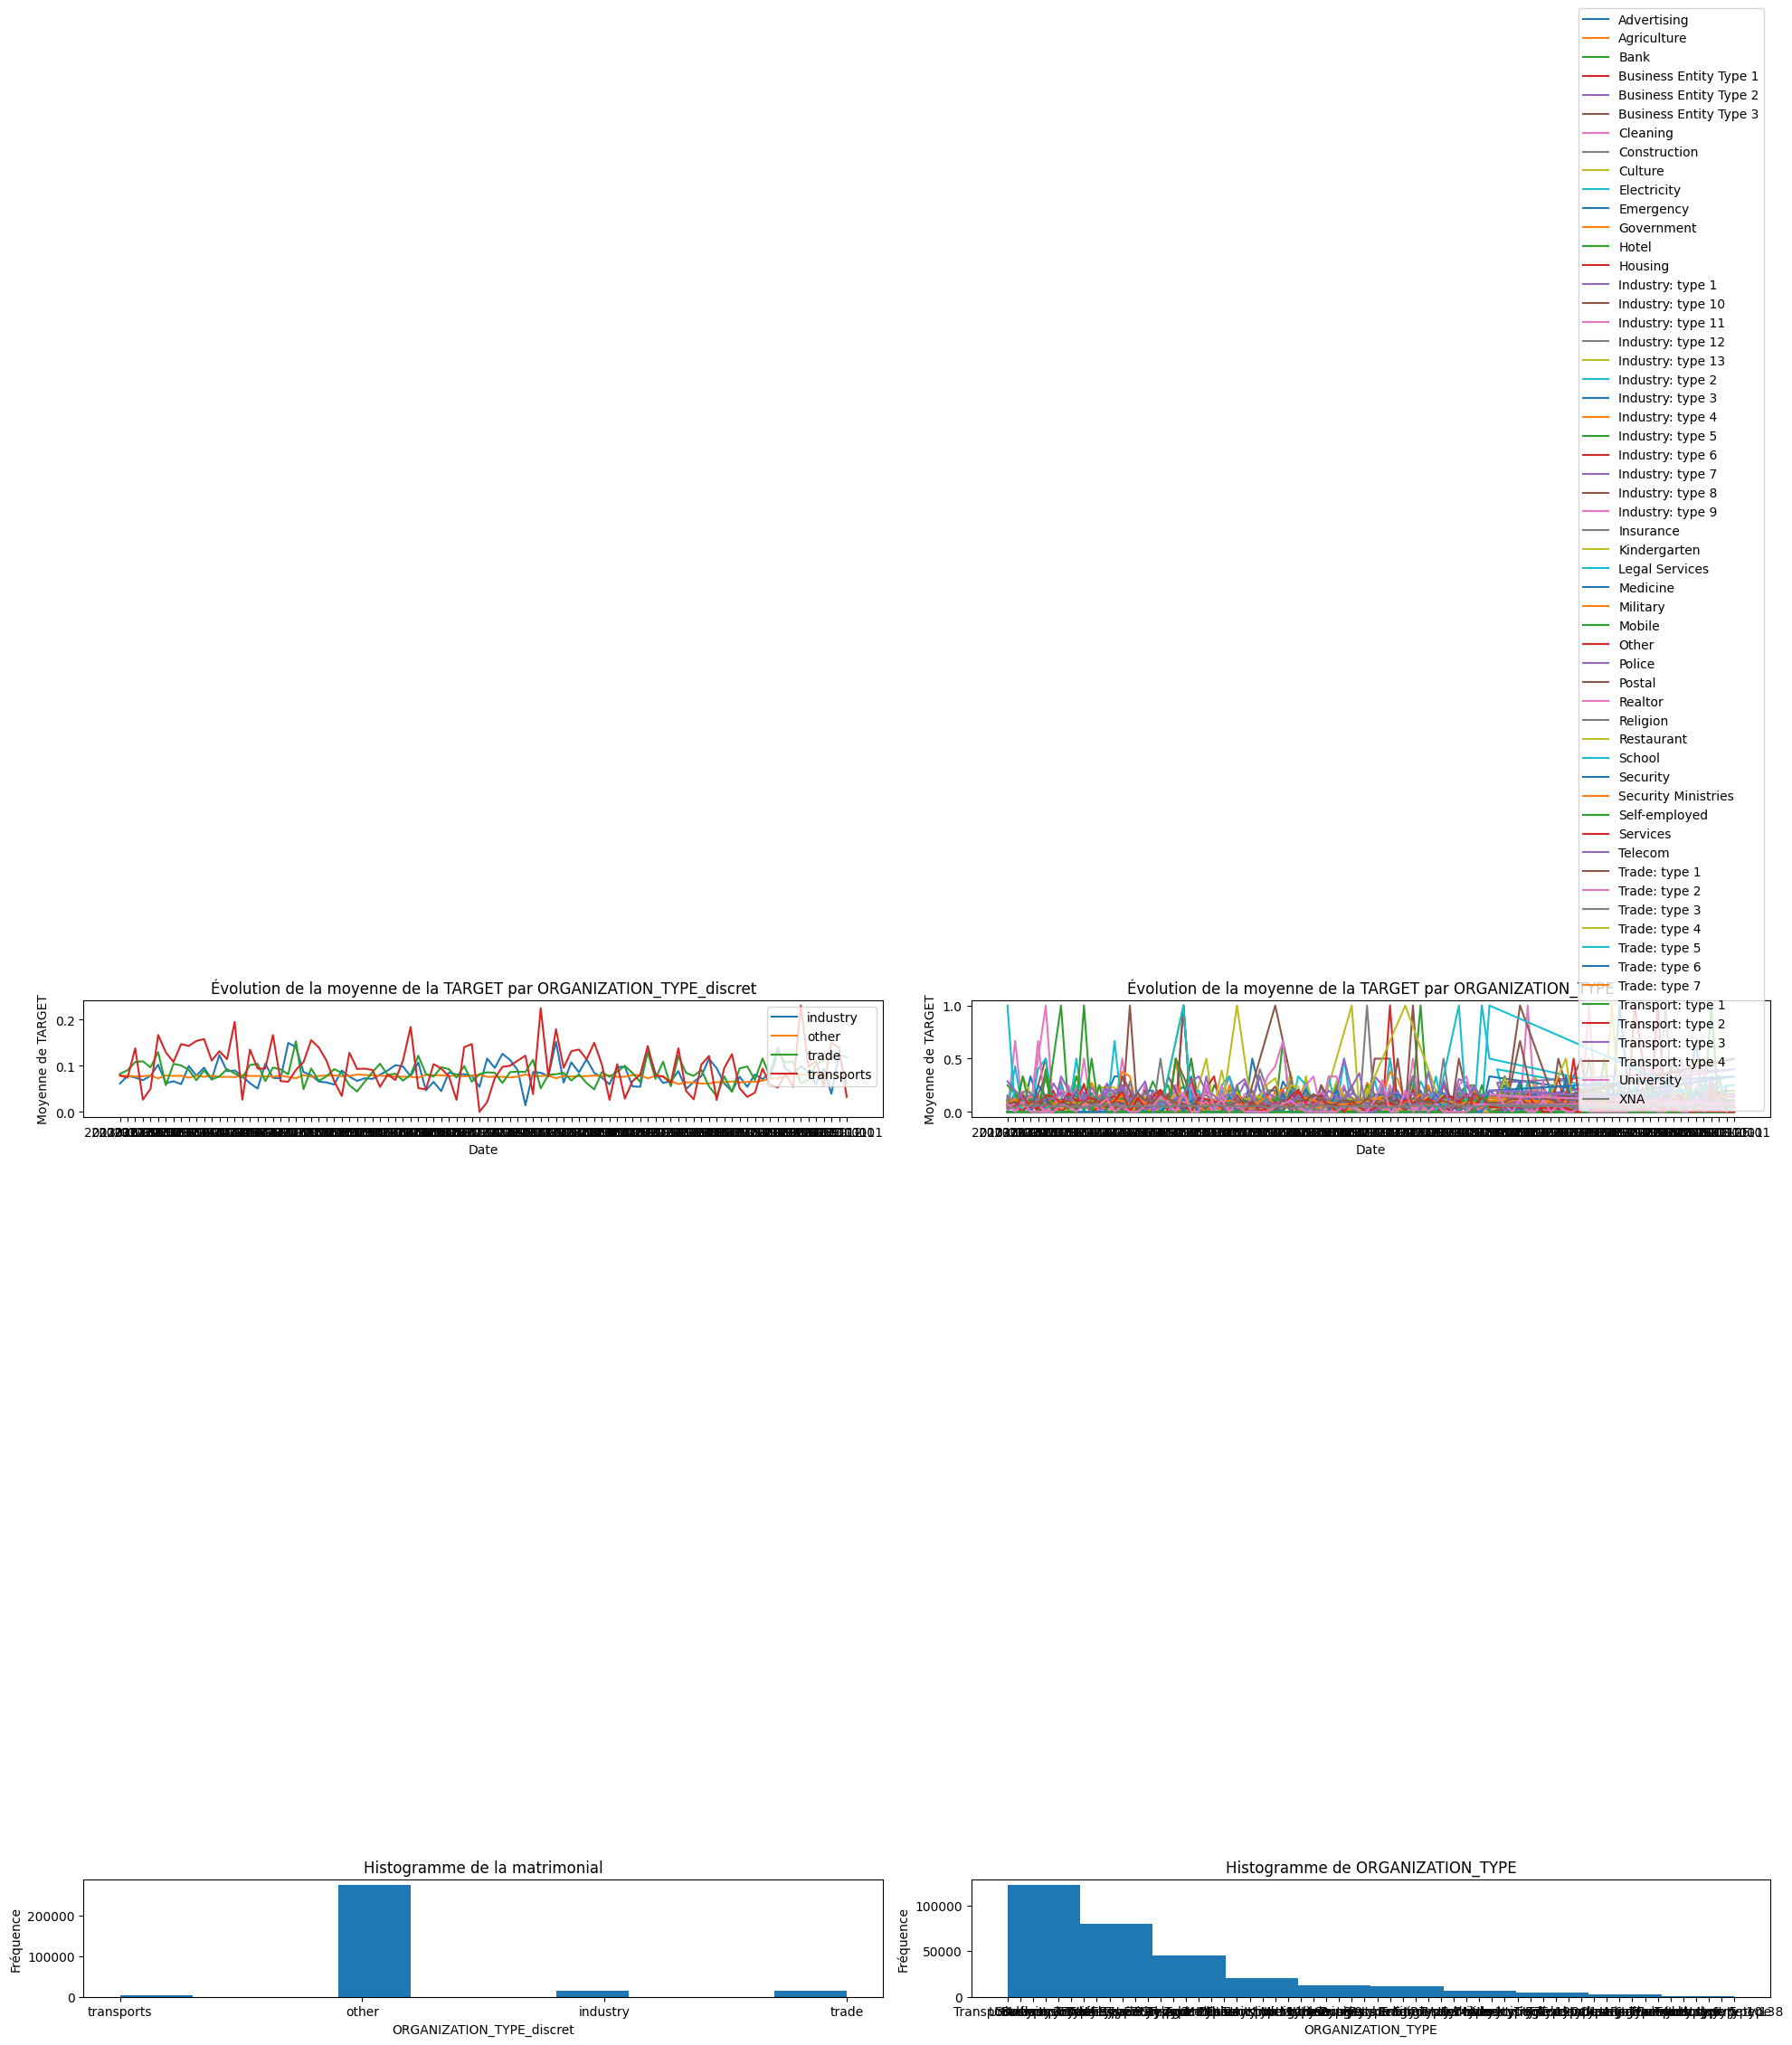

In [607]:
import matplotlib.pyplot as plt

# Création d'une grille de subplots avec 2 lignes et 2 colonnes
# Les deux premiers subplots (en haut) pour les courbes, et le troisième (en bas à gauche) pour l'histogramme
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))

for idx, col in enumerate(data[['ORGANIZATION_TYPE_discret', 'ORGANIZATION_TYPE']].columns):
    result = data.groupby([col, 'date_mensuelle'])['TARGET'].mean().reset_index()
   
    for genre, group in result.groupby(col):
        axes[0, idx].plot(group['date_mensuelle'], group['TARGET'], label=genre)
    
    axes[0, idx].legend()
    axes[0, idx].set_xlabel('Date')
    axes[0, idx].set_ylabel('Moyenne de TARGET')
    axes[0, idx].set_title(f'Évolution de la moyenne de la TARGET par {col}')

# Histogramme pour la 'Skilled' dans le troisième subplot (en bas à gauche)
axes[1, 0].hist(data["ORGANIZATION_TYPE_discret"])
axes[1, 0].set_title('Histogramme de la matrimonial')
axes[1, 0].set_xlabel('ORGANIZATION_TYPE_discret')
axes[1, 0].set_ylabel('Fréquence')

axes[1, 1].hist(data["ORGANIZATION_TYPE"].dropna())  # Utilisez dropna() pour exclure les valeurs NaN
axes[1, 1].set_title('Histogramme de ORGANIZATION_TYPE')
axes[1, 1].set_xlabel('ORGANIZATION_TYPE')
axes[1, 1].set_ylabel('Fréquence')
plt.tight_layout()
plt.show()


In [608]:
data.drop(columns=["NAME_TYPE_SUITE_discret", "NAME_TYPE_SUITE",
                   "NAME_INCOME_TYPE_discret", "NAME_INCOME_TYPE",
                   "NAME_EDUCATION_TYPE",
                   "NAME_FAMILY_STATUS_discret", "NAME_FAMILY_STATUS",
                   "OCCUPATION_TYPE",
                   "WEEKDAY_APPR_PROCESS_START_discret", "WEEKDAY_APPR_PROCESS_START",
                   "FONDKAPREMONT_MODE",
                    "HOUSETYPE_MODE",
                    "WALLSMATERIAL_MODE_discret", "WALLSMATERIAL_MODE",
                    "ORGANIZATION_TYPE_discret", "ORGANIZATION_TYPE"], axis=1, inplace=True)

In [609]:
data.select_dtypes(include='object').columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_HOUSING_TYPE', 'EMERGENCYSTATE_MODE', 'date_mensuelle',
       'NAME_EDUCATION_TYPE_discret', 'OCCUPATION_TYPE_discret',
       'FONDKAPREMONT_MODE_discret', 'HOUSETYPE_MODE_discret'],
      dtype='object')

In [610]:
data.head()

Unnamed: 0  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0           0       0             1          292500.0   1102500.0   
1           1       0             0          180000.0    270000.0   
2           2       0             2           67500.0     80865.0   
3           3       0             1          157500.0   1078200.0   
4           4       0             1          112500.0    225000.0   

   AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        1102500.0                    0.018209      -11763           -688   
1         270000.0                    0.003122      -12460          -2988   
2          67500.0                    0.018634      -11118           -907   
3         900000.0                    0.072508      -14776          -1677   
4         225000.0                    0.004849      -14918           -140   

   DAYS_REGISTRATION  ...  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0             -500.0  ...            M             Y                Y   
1            -1576.0  ...            F             N                Y   
2           -10654.0  ...            F             Y                N   
3            -8387.0  ...            F             Y                Y   
4            -2716.0  ...            F             N                N   

   NAME_HOUSING_TYPE  EMERGENCYSTATE_MODE  date_mensuelle  \
0  House / apartment                   No      2013-01-01   
1       With parents                  NaN      2013-01-01   
2  House / apartment                   No      2013-01-01   
3  House / apartment                   No      2013-01-01   
4  House / apartment                  NaN      2013-01-01   

   NAME_EDUCATION_TYPE_discret  OCCUPATION_TYPE_discret  \
0                        lower              low_skilled   
1                       higher           middle_skilled   
2                        lower              low_skilled   
3                        lower           middle_skilled   
4                        lower           middle_skilled   

   FONDKAPREMONT_MODE_discret  HOUSETYPE_MODE_discret  
0               not_specified              appartment  
1               not_specified                  houses  
2               not_specified              appartment  
3                         reg              appartment  
4               not_specified                  houses  

[5 rows x 55 columns]

In [611]:
data.select_dtypes(include=np.number).columns

Index(['Unnamed: 0', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_18',
       'AMT_REQ_CREDIT_BUREAU_DA

In [612]:
data[['CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_18',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT']]

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_GOODS_PRICE  \
0                  1          292500.0   1102500.0        1102500.0   
1                  0          180000.0    270000.0         270000.0   
2                  2           67500.0     80865.0          67500.0   
3                  1          157500.0   1078200.0         900000.0   
4                  1          112500.0    225000.0         225000.0   
...              ...               ...         ...              ...   
306102             0          148500.0    669600.0         598500.0   
306103             0           90000.0    312768.0         270000.0   
306104             0          157500.0   1724220.0        1350000.0   
306105             0           63000.0    177768.0         135000.0   
306106             2          135000.0    592560.0         450000.0   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                         0.018209      -11763           -688   
1                         0.003122      -12460          -2988   
2                         0.018634      -11118           -907   
3                         0.072508      -14776          -1677   
4                         0.004849      -14918           -140   
...                            ...         ...            ...   
306102                    0.020246      -19046         365243   
306103                    0.035792      -16483          -2692   
306104                    0.072508      -16588          -1103   
306105                    0.007305      -22578         365243   
306106                    0.035792      -13865           -530   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_EMP_PHONE  ...  \
0                  -500.0            -3325               1  ...   
1                 -1576.0             -454               1  ...   
2                -10654.0             -425               1  ...   
3                 -8387.0            -4811               1  ...   
4                 -2716.0            -4119               1  ...   
...                   ...              ...             ...  ...   
306102             -296.0            -2602               0  ...   
306103            -1728.0              -24               1  ...   
306104            -1203.0             -110               1  ...   
306105            -4293.0            -4319               0  ...   
306106            -2816.0            -2817               1  ...   

        FLAG_DOCUMENT_9  FLAG_DOCUMENT_11  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  \
0                     0                 0                 0                 0   
1                     0                 0                 0                 0   
2                     0                 0                 0                 0   
3                     0                 0                 0                 0   
4                     0                 0                 0                 0   
...                 ...               ...               ...               ...   
306102                0                 0                 0                 0   
306103                0                 0                 0                 0   
306104                1                 0                 0                 0   
306105                0                 0                 0                 0   
306106                0                 0                 0                 0   

        FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_18  \
0                      0                 0                 0   
1                      0                 0                 0   
2                      0                 0                 0   
3                      0                 0                 0   
4                      0                 0                 0   
...                  ...               ...               ...   
306102                 0                 0                 0   
306103                 0                 0                 0   
306104              

In [613]:
data.shape

(306107, 55)

In [614]:
data.to_csv("application_train_vf_discretisation_cat.csv", index=False)

In [615]:
for col in data.select_dtypes(include=["float","int"]).columns:
    if col != "TARGET":
        print(col,":", data[col].nunique())

Unnamed: 0 : 306107
CNT_CHILDREN : 15
AMT_INCOME_TOTAL : 2545
AMT_CREDIT : 5597
AMT_GOODS_PRICE : 1000
REGION_POPULATION_RELATIVE : 81
DAYS_BIRTH : 17460
DAYS_EMPLOYED : 12571
DAYS_REGISTRATION : 15687
DAYS_ID_PUBLISH : 6168
FLAG_EMP_PHONE : 2
FLAG_WORK_PHONE : 2
FLAG_PHONE : 2
CNT_FAM_MEMBERS : 17
REGION_RATING_CLIENT : 3
REGION_RATING_CLIENT_W_CITY : 3
HOUR_APPR_PROCESS_START : 24
REG_REGION_NOT_LIVE_REGION : 2
REG_REGION_NOT_WORK_REGION : 2
REG_CITY_NOT_LIVE_CITY : 2
REG_CITY_NOT_WORK_CITY : 2
LIVE_CITY_NOT_WORK_CITY : 2
EXT_SOURCE_2 : 119451
EXT_SOURCE_3 : 812
OBS_30_CNT_SOCIAL_CIRCLE : 33
DEF_30_CNT_SOCIAL_CIRCLE : 10
OBS_60_CNT_SOCIAL_CIRCLE : 33
DEF_60_CNT_SOCIAL_CIRCLE : 9
DAYS_LAST_PHONE_CHANGE : 3773
FLAG_DOCUMENT_2 : 2
FLAG_DOCUMENT_3 : 2
FLAG_DOCUMENT_6 : 2
FLAG_DOCUMENT_8 : 2
FLAG_DOCUMENT_9 : 2
FLAG_DOCUMENT_11 : 2
FLAG_DOCUMENT_13 : 2
FLAG_DOCUMENT_14 : 2
FLAG_DOCUMENT_15 : 2
FLAG_DOCUMENT_16 : 2
FLAG_DOCUMENT_18 : 2
AMT_REQ_CREDIT_BUREAU_DAY : 9
AMT_REQ_CREDIT_BUREAU_MO

## Transformation de certaines numériques en catégorielles

In [616]:
for col in data.select_dtypes(include=["float","int"]).columns:
    if (data[col].nunique() <= 20) and (col != "TARGET"):
        data[col] = data[col].astype(str)

## Discrétisation numérique

In [617]:
!pip install optbinning

In [618]:
data.drop(columns=["Unnamed: 0"], inplace=True)

In [619]:
data.select_dtypes(include=["int", "float"]).columns

Index(['TARGET', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'HOUR_APPR_PROCESS_START',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_MON'],
      dtype='object')

In [620]:
nums_vars = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'HOUR_APPR_PROCESS_START',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_MON']

In [621]:
data[nums_vars]

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_GOODS_PRICE  DAYS_BIRTH  \
0               292500.0   1102500.0        1102500.0      -11763   
1               180000.0    270000.0         270000.0      -12460   
2                67500.0     80865.0          67500.0      -11118   
3               157500.0   1078200.0         900000.0      -14776   
4               112500.0    225000.0         225000.0      -14918   
...                  ...         ...              ...         ...   
306102          148500.0    669600.0         598500.0      -19046   
306103           90000.0    312768.0         270000.0      -16483   
306104          157500.0   1724220.0        1350000.0      -16588   
306105           63000.0    177768.0         135000.0      -22578   
306106          135000.0    592560.0         450000.0      -13865   

        DAYS_EMPLOYED  HOUR_APPR_PROCESS_START  EXT_SOURCE_2  EXT_SOURCE_3  \
0                -688                        9      0.616187      0.651260   
1               -2988                       10      0.548623      0.413597   
2                -907                       10      0.582081      0.399676   
3               -1677                       10      0.607885      0.627991   
4                -140                       15      0.091309      0.463275   
...               ...                      ...           ...           ...   
306102         365243                        8      0.068494      0.722393   
306103          -2692                       12      0.661632      0.824595   
306104          -1103                       15      0.740452      0.746300   
306105         365243                        8      0.231137      0.410103   
306106           -530                       13      0.687455      0.157595   

        OBS_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
0                            1.0                       1.0   
1                            0.0                       0.0   
2                            0.0                       0.0   
3                            0.0                       0.0   
4                            0.0                       0.0   
...                          ...                       ...   
306102                       1.0                       1.0   
306103                       0.0                       0.0   
306104                       0.0                       0.0   
306105                       0.0                       0.0   
306106                       1.0                       1.0   

        AMT_REQ_CREDIT_BUREAU_MON  
0                             0.0  
1                             1.0  
2                             0.0  
3                             0.0  
4                             0.0  
...                           ...  
306102                        0.0  
306103                        0.0  
306104                        0.0  
306105                        1.0  
306106                        0.0  

[306107 rows x 11 columns]

In [622]:
from optbinning import OptimalBinning

for variable in data[nums_vars]:
    print(variable,"\n")
    X = data[variable].values  # Les valeurs de la variable à discrétiser
    y = data['TARGET'].values  # La variable cible

    optb = OptimalBinning(name=variable, dtype="numerical", solver="cp",min_n_bins=2 ,max_n_bins=3,
                         divergence="js")
                        #prebinning_method="quantile")

    optb.fit(X, y)

    binning_table = optb.binning_table
    print(binning_table.build())

    X_transformed = optb.transform(X, metric="bins")

    data[f'{variable}_binned'] = X_transformed

AMT_INCOME_TOTAL 

                           Bin   Count  Count (%)  Non-event  Event  \
0            (-inf, 216011.25)  238068   0.777728     219001  19067   
1       [216011.25, 310950.00)   46024   0.150353      42843   3181   
2             [310950.00, inf)   22015   0.071919      20780   1235   
3                      Special       0   0.000000          0      0   
4                      Missing       0   0.000000          0      0   
Totals                          306107   1.000000     282624  23483   

        Event rate       WoE        IV        JS  
0         0.080091 -0.046723  0.001732  0.000216  
1         0.069116  0.112506  0.001815  0.000227  
2         0.056098  0.335079  0.007015  0.000873  
3         0.000000       0.0  0.000000  0.000000  
4         0.000000       0.0  0.000000  0.000000  
Totals    0.076715            0.010561  0.001316  
AMT_CREDIT 

                           Bin   Count  Count (%)  Non-event  Event  \
0            (-inf, 281884.50)   81352   0

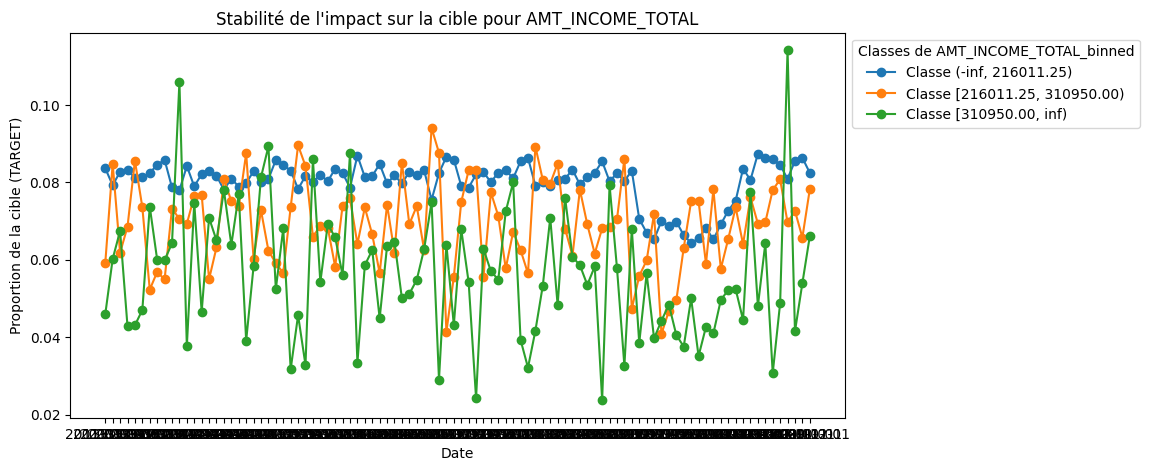

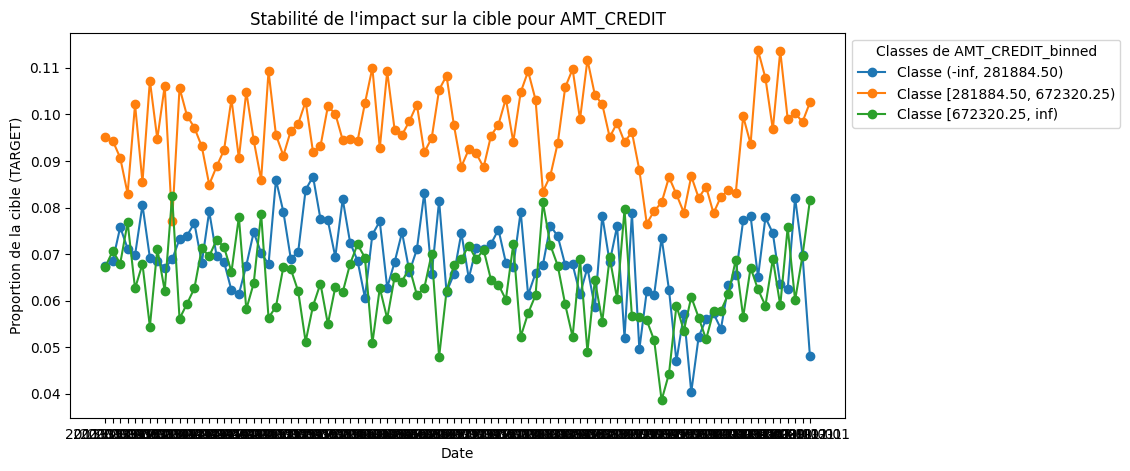

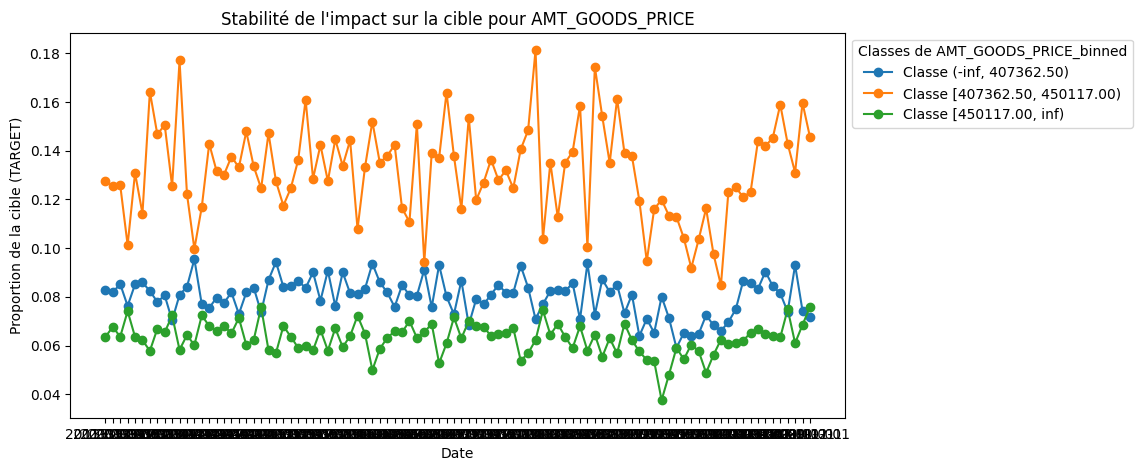

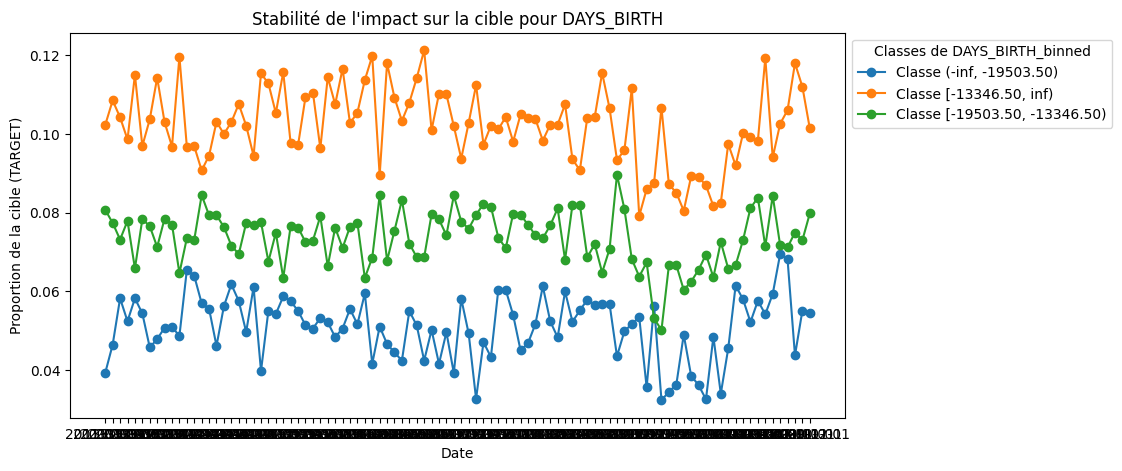

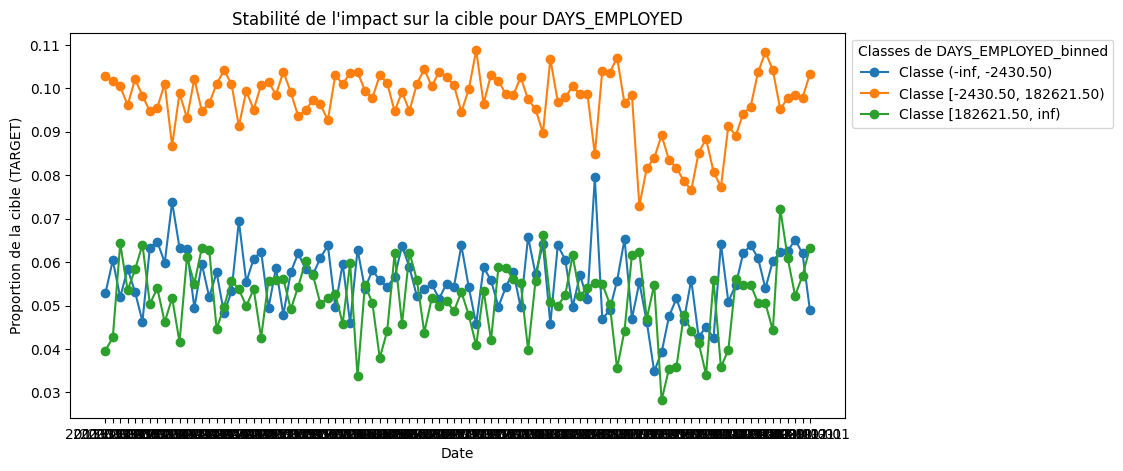

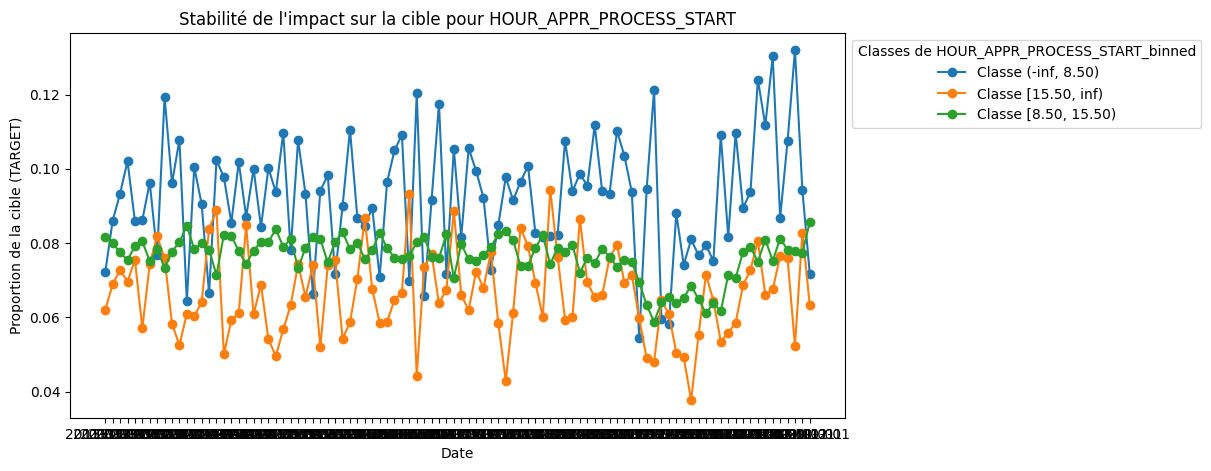

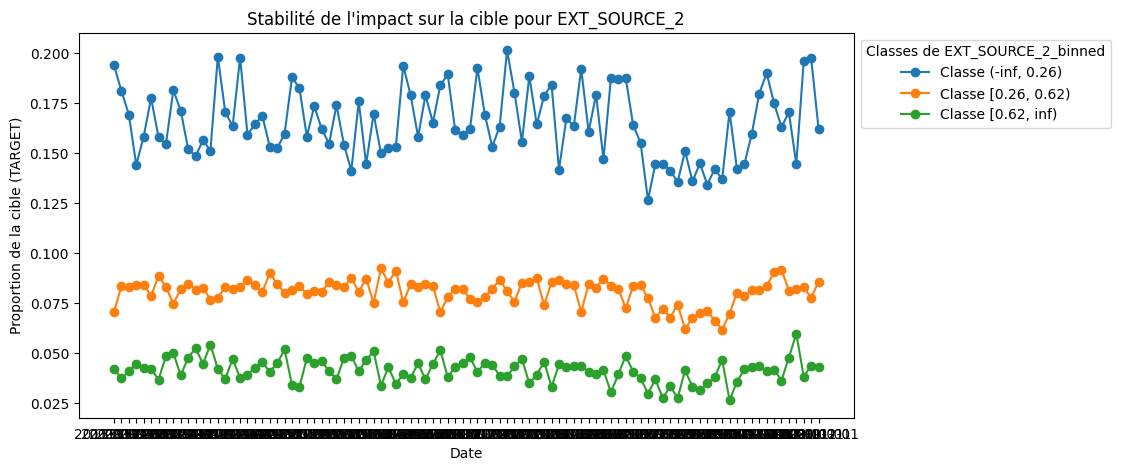

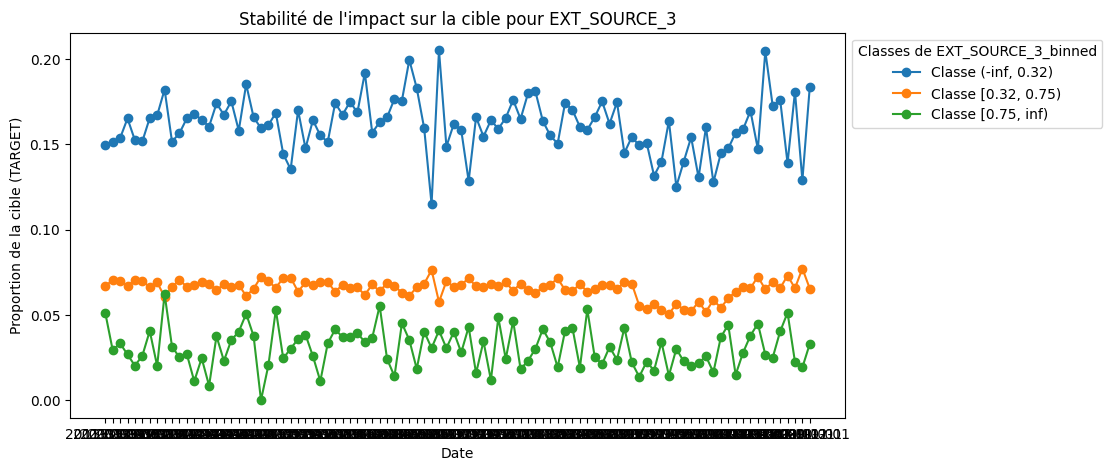

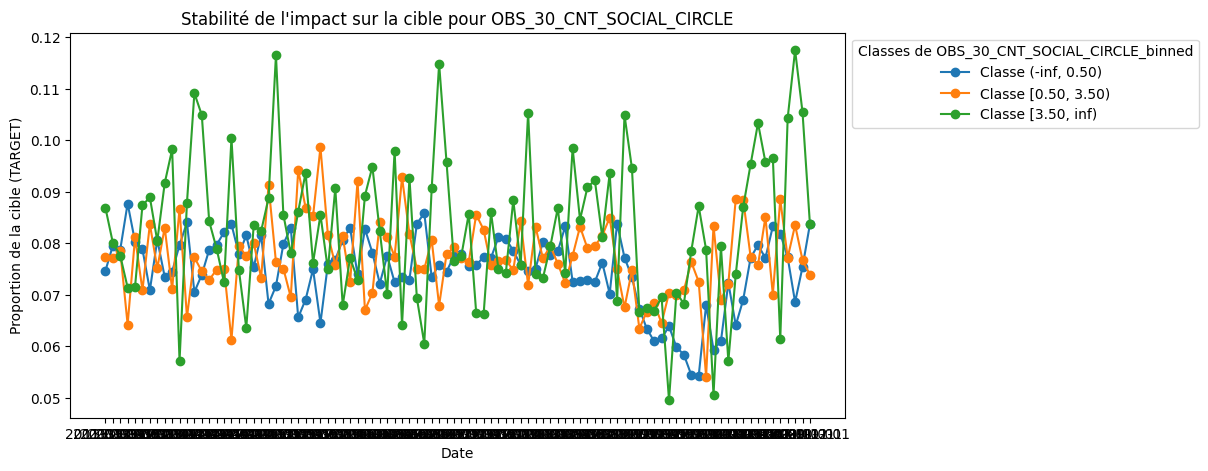

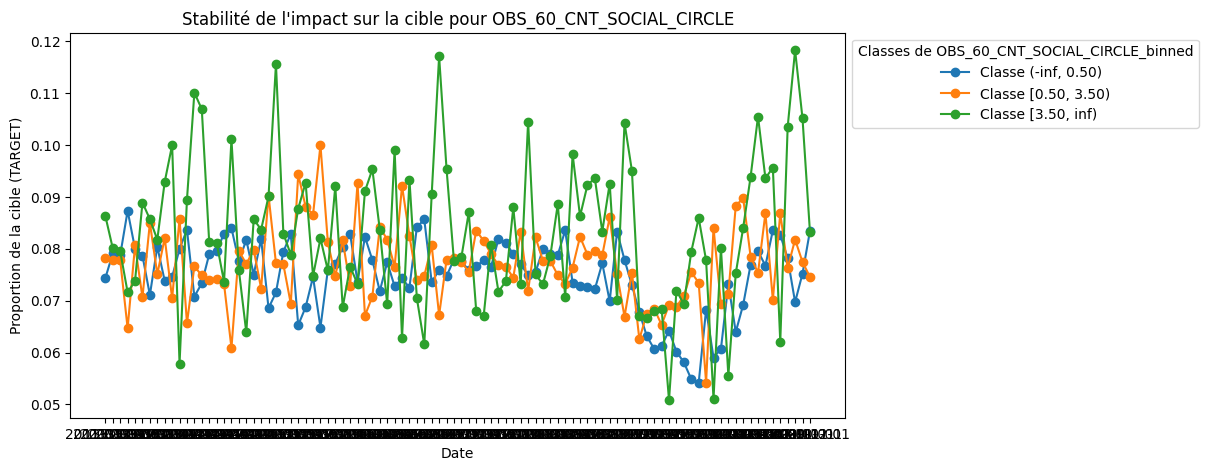

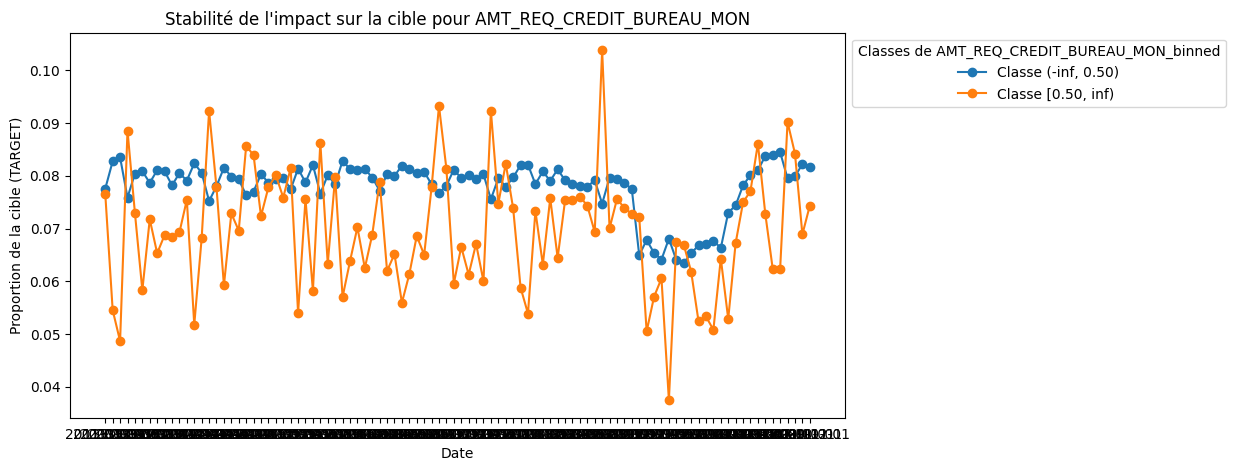

In [623]:
# Créer une fonction pour calculer la stabilité de l'impact sur la cible
def calculate_stability(column):
    stability_df = data.groupby(['date_mensuelle', column])['TARGET'].mean().unstack()
    
    # Calcul de la stabilité pour chaque combinaison de 'date' et de la var disctétisée spécifiée 'column'
    stability_df['stability'] = stability_df.std(axis=1) / stability_df.mean(axis=1)
    return stability_df


for column in nums_vars:
    stability_df = calculate_stability(f"{column}_binned")  # Utilisez la colonne discrétisée
    plt.figure(figsize=(10, 5))
    
    for class_label in stability_df.drop('stability', axis=1).columns:
        values = stability_df[class_label]
        plt.plot(stability_df.index, values, label=f'Classe {class_label}', marker='o')
    
    plt.title(f'Stabilité de l\'impact sur la cible pour {column}')
    plt.xlabel('Date')
    plt.ylabel('Proportion de la cible (TARGET)')
    plt.legend(title=f'Classes de {column}_binned', loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

A jeter : AMT_REQ_CREDIT_BUREAU_MON, OBS_60_CNT_SOCIAL_CIRCLE, OBS_30_CNT_SOCIAL_CIRCLE, HOUR_APPR_PROCESS_START, DAYS_EMPLOYED, AMT_CREDIT, AMT_INCOME_TOTAL

A retravailler : REGION_POPULATION_RELATIVE, DAYS_REGISTRATION, DAYS_ID_PUBLISH, DAYS_LAST_PHONE_CHANGE


In [624]:
from optbinning import OptimalBinning
work_on = ["REGION_POPULATION_RELATIVE", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "DAYS_LAST_PHONE_CHANGE"]
for variable in data[work_on]:
    print(variable,"\n")
    X = data[variable].values  # Les valeurs de la variable à discrétiser
    y = data['TARGET'].values  # La variable cible

    optb = OptimalBinning(name=variable, dtype="numerical", solver="cp",min_n_bins=2 ,max_n_bins=2,
                         divergence="js")
                        #prebinning_method="quantile")

    optb.fit(X, y)

    binning_table = optb.binning_table
    print(binning_table.build())

    X_transformed = optb.transform(X, metric="bins")

    data[f'{variable}_binned'] = X_transformed

REGION_POPULATION_RELATIVE 

                 Bin   Count  Count (%)  Non-event  Event  Event rate  \
0       (-inf, 0.03)  261340   0.853754     240183  21157    0.080956   
1        [0.03, inf)   44767   0.146246      42441   2326    0.051958   
2            Special       0   0.000000          0      0    0.000000   
3            Missing       0   0.000000          0      0    0.000000   
Totals                306107   1.000000     282624  23483    0.076715   

             WoE        IV        JS  
0       -0.05841  0.002986  0.000373  
1       0.416124  0.021271  0.002640  
2            0.0  0.000000  0.000000  
3            0.0  0.000000  0.000000  
Totals            0.024257  0.003013  
DAYS_REGISTRATION 

                     Bin   Count  Count (%)  Non-event  Event  Event rate  \
0       (-inf, -7418.50)   77873   0.254398      73183   4690    0.060226   
1        [-7418.50, inf)  228234   0.745602     209441  18793    0.082341   
2                Special       0   0.000000    

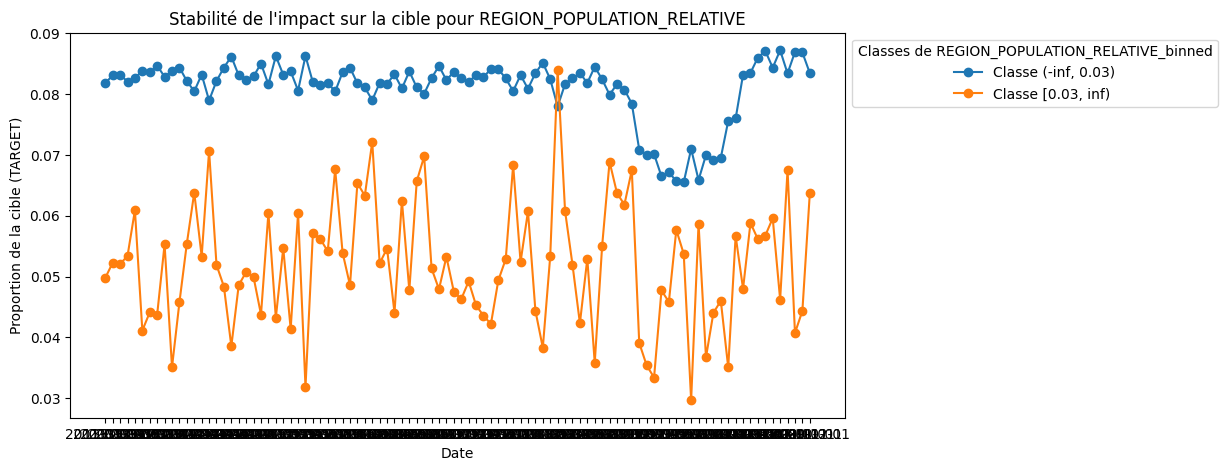

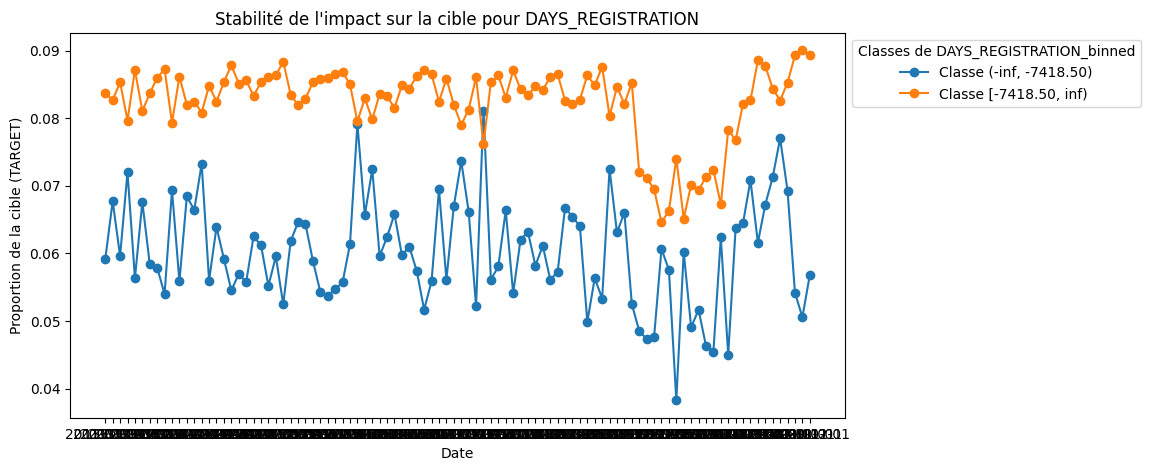

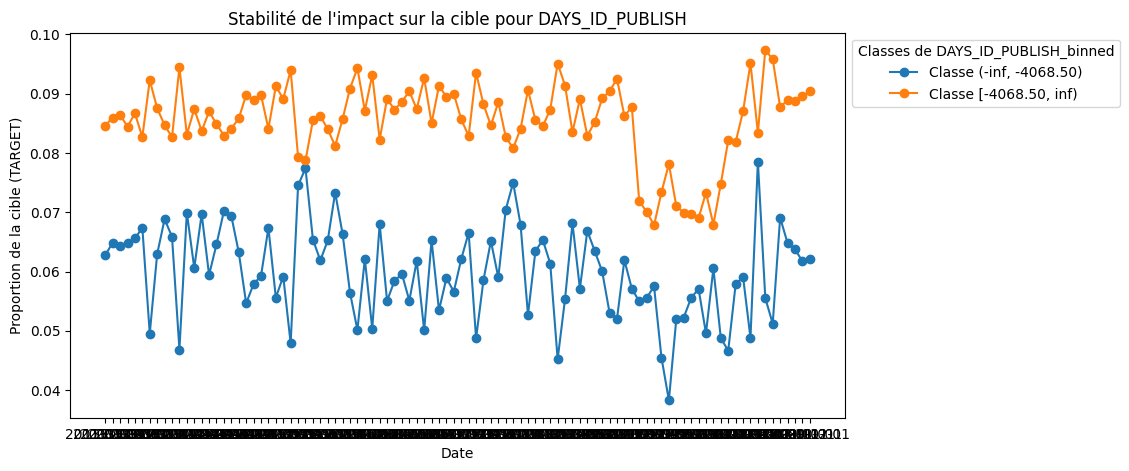

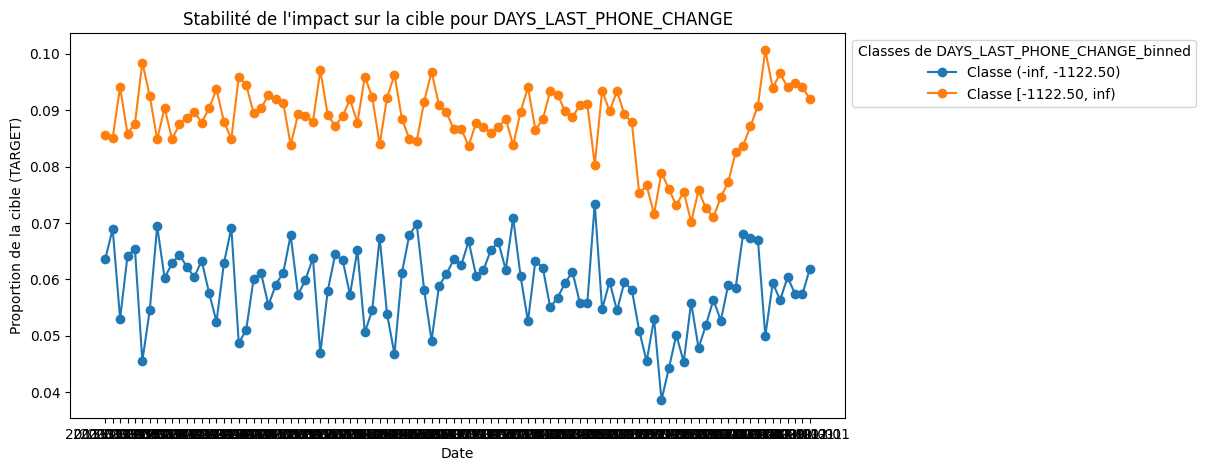

In [625]:
# Créer une fonction pour calculer la stabilité de l'impact sur la cible
def calculate_stability(column):
    stability_df = data.groupby(['date_mensuelle', column])['TARGET'].mean().unstack()
    
    # Calcul de la stabilité pour chaque combinaison de 'date' et de la var disctétisée spécifiée 'column'
    stability_df['stability'] = stability_df.std(axis=1) / stability_df.mean(axis=1)
    return stability_df


for column in work_on:
    stability_df = calculate_stability(f"{column}_binned")  # Utilisez la colonne discrétisée
    plt.figure(figsize=(10, 5))
    
    for class_label in stability_df.drop('stability', axis=1).columns:
        values = stability_df[class_label]
        plt.plot(stability_df.index, values, label=f'Classe {class_label}', marker='o')
    
    plt.title(f'Stabilité de l\'impact sur la cible pour {column}')
    plt.xlabel('Date')
    plt.ylabel('Proportion de la cible (TARGET)')
    plt.legend(title=f'Classes de {column}_binned', loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

In [629]:
cols = data.select_dtypes(include = ["int", "float"]).columns
lis = []
for col in cols :
    if col != "TARGET":
        lis.append(col)

In [632]:
data.drop(lis,axis=1, inplace=True)

In [633]:
drop = ["AMT_REQ_CREDIT_BUREAU_MON_binned", "OBS_60_CNT_SOCIAL_CIRCLE_binned", "OBS_30_CNT_SOCIAL_CIRCLE_binned",
        "HOUR_APPR_PROCESS_START_binned", "DAYS_EMPLOYED_binned", "AMT_CREDIT_binned", "AMT_INCOME_TOTAL_binned"]
data.drop(drop, axis=1, inplace=True)

In [634]:
data.head()

TARGET CNT_CHILDREN FLAG_EMP_PHONE FLAG_WORK_PHONE FLAG_PHONE  \
0       0            1              1               0          1   
1       0            0              1               0          1   
2       0            2              1               1          0   
3       0            1              1               0          0   
4       0            1              1               0          1   

  CNT_FAM_MEMBERS REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY  \
0             3.0                    3                           3   
1             2.0                    3                           3   
2             4.0                    2                           2   
3             2.0                    1                           1   
4             3.0                    2                           2   

  REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION  ...  \
0                          0                          0  ...   
1                          0                          0  ...   
2                          0                          0  ...   
3                          0                          0  ...   
4                          1                          1  ...   

  FONDKAPREMONT_MODE_discret HOUSETYPE_MODE_discret AMT_GOODS_PRICE_binned  \
0              not_specified             appartment       [450117.00, inf)   
1              not_specified                 houses      (-inf, 407362.50)   
2              not_specified             appartment      (-inf, 407362.50)   
3                        reg             appartment       [450117.00, inf)   
4              not_specified                 houses      (-inf, 407362.50)   

        DAYS_BIRTH_binned EXT_SOURCE_2_binned EXT_SOURCE_3_binned  \
0        [-13346.50, inf)        [0.26, 0.62)        [0.32, 0.75)   
1        [-13346.50, inf)        [0.26, 0.62)        [0.32, 0.75)   
2        [-13346.50, inf)        [0.26, 0.62)        [0.32, 0.75)   
3  [-19503.50, -13346.50)        [0.26, 0.62)        [0.32, 0.75)   
4  [-19503.50, -13346.50)        (-inf, 0.26)        [0.32, 0.75)   

  REGION_POPULATION_RELATIVE_binned DAYS_REGISTRATION_binned  \
0                      (-inf, 0.03)          [-7418.50, inf)   
1                      (-inf, 0.03)          [-7418.50, inf)   
2                      (-inf, 0.03)         (-inf, -7418.50)   
3                       [0.03, inf)         (-inf, -7418.50)   
4                      (-inf, 0.03)          [-7418.50, inf)   

  DAYS_ID_PUBLISH_binned DAYS_LAST_PHONE_CHANGE_binned  
0        [-4068.50, inf)               [-1122.50, inf)  
1        [-4068.50, inf)               [-1122.50, inf)  
2        [-4068.50, inf)               [-1122.50, inf)  
3       (-inf, -4068.50)               [-1122.50, inf)  
4       (-inf, -4068.50)              (-inf, -1122.50)  

[5 rows x 47 columns]

In [635]:
data.shape

(306107, 47)

In [636]:
data.dtypes

TARGET                                int64
CNT_CHILDREN                         object
FLAG_EMP_PHONE                       object
FLAG_WORK_PHONE                      object
FLAG_PHONE                           object
CNT_FAM_MEMBERS                      object
REGION_RATING_CLIENT                 object
REGION_RATING_CLIENT_W_CITY          object
REG_REGION_NOT_LIVE_REGION           object
REG_REGION_NOT_WORK_REGION           object
REG_CITY_NOT_LIVE_CITY               object
REG_CITY_NOT_WORK_CITY               object
LIVE_CITY_NOT_WORK_CITY              object
DEF_30_CNT_SOCIAL_CIRCLE             object
DEF_60_CNT_SOCIAL_CIRCLE             object
FLAG_DOCUMENT_2                      object
FLAG_DOCUMENT_3                      object
FLAG_DOCUMENT_6                      object
FLAG_DOCUMENT_8                      object
FLAG_DOCUMENT_9                      object
FLAG_DOCUMENT_11                     object
FLAG_DOCUMENT_13                     object
FLAG_DOCUMENT_14                

In [638]:
data.to_csv("application_train_vf_after_discretisation.csv", index=False)